In [3]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

from jasyntho import SynthTree
from jasyntho.extract import ExtractReaction


def extract_subgraph(graph, start_node):
    """Use BFS to find all nodes reachable from start_node."""
    reachable_nodes = set(nx.bfs_tree(graph, start_node))
    return graph.subgraph(reachable_nodes).copy()


def plot_graph(G):
    fig = plt.figure(figsize=(10, 7))
    pos = graphviz_layout(G, prog="dot")
    nx.draw(G, pos, with_labels=True, arrows=True)
    plt.show()


def update_graph(G, new_edges, rm_edges, rm_nodes, names_mapping):
    """function takes as input new_edges, rm_edges, rm_nodes, names_mapping"""

    # Relabel nodes
    G = nx.relabel_nodes(G, names_mapping)

    # Updates edges
    for e in new_edges:
        G.add_edge(e[0], e[1])
    for e in rm_edges:
        G.remove_edge(e[0], e[1])

    # Remove nodes
    for n in rm_nodes:
        G.remove_node(n)

    # Remove nodes with length 1
    reach_sgs = SynthTree.get_reach_subgraphs(G)
    for k, g in reach_sgs.items():
        if len(g) == 1:
            G.remove_node(k)
    return G


async def extract_tree(path, model="gpt-3.5-turbo"):
    tree = SynthTree.from_dir(path)
    tree.rxn_extract = ExtractReaction(model=model)

    tree.raw_prods = await tree.async_extract_rss(mode="vision")
    tree.products = [p for p in tree.raw_prods if not p.isempty()]

    reach_sgs = tree.partition()
    return tree

/home/andres/anaconda3/envs/jasyntho/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# ja074300t

In [ ]:
path = "../benchmark/papers/ja074300t"
tree = await extract_tree(path)

In [ ]:
fg = tree.full_g.copy()

names_mapping = {
    "SI–1 2": "SI-1",
    "oxazolidinone-lactol 70": "70",
    "(Z)-114": "114",
    "Aldehyde": "SI-30",
}

# a <- b reaction.  a is product, b is reactant
new_edges = [
    ("58", "(-)-36"),
    ("58", "57"),
    ("58", "DME"),
    ("57", "EtOAc"),
    ("98", "93"),
    ("98", "93"),
    ("98", "sodium chlorite"),
    ("98", "MeCN"),
    ("98", "sodium phosphate"),
    ("98", "TEMPO"),
    ("98", "MTBE"),
    ("98", "MTBE"),
    ("99", "98"),
    ("99", "MeI"),
    ("99", "potassium carbonate"),
    ("99", "DMF"),
    ("SI-17", "SI-16"),
    ("SI-17", "THF"),
    ("SI-17", "NH4Cl"),
    ("SI-17", "4-pentenyl-1-magnesium bromide"),
    ("101", "SI-17"),
    ("101", "DMSO"),
    ("101", "Et3N"),
    ("101", "oxalyl chloride"),
    ("SI-18", "101"),
    ("SI-18", "102"),
    ("SI-18", "N-potassiumhexamethyldisilazane"),
    ("103", "HF"),
    ("103", "SI-18"),
    ("113", "(E)-107"),
    ("113", "(Z)-107"),
    ("118", "117"),
    ("118", "116"),
    ("122", "SI-23"),
    ("123", "122"),
    ("SI-24", "123"),
    ("124", "SI-24"),
]

rm_edges = [
    ("101", "SI-16"),
    ("101", "Mg"),
    ("101", "5-bromo-1-pentene"),
]

rm_nodes = ["OOOTBSOTIPS1163", "TBSSI-223", "NNOTIPSOOOTBSSI-23", "17b"]

# gt head nodes
gthn = ["32", "75", "70", "100", "105", "114", "1", "131", "132", "SI-29"]

reach_sgs = SynthTree.get_reach_subgraphs(fg)
print(len(reach_sgs))

# for g in reach_sgs.values():
#     plot_graph(g)
#     print(g.nodes)
# if len(g) > 1:
#     if not any(map(lambda x: x in g, gthn)):
#         plot_graph(g)
#         print(g.nodes)


import pickle

with open(os.path.join(path, "gt_graph.pickle"), "wb") as f:
    pickle.dump(fg, f)

# ja512124c

In [ ]:
path = "../benchmark/papers/jacs.0c00308"
tree = await extract_tree(path)

In [ ]:
import os

fg = tree.full_g.copy()

names_mapping = {
    "epoxide 25": "25",
    "cyclohexadienone 26": "26",
    "tetracycle 22": "22",
    "diol 24": "24",
    "diketone 13": "13",
    "enone 23": "23",
    "alcohol 27": "27",
    "spirolleycle 30": "30",
    "corresponding ketone": "18",
    "4,4-dimethyl cyclopentanone 37": "37",
    "Acetonide 38": "38",
    "tetracyclic diketones C7-deoxy-13": "C7-deoxy-13",
    "MOM ether S-6": "S-6",
    "vinylphenol C7-deoxy-14": "C7-deoxy-14",
}

# a <- b reaction.  a is product, b is reactant
new_edges = [
    ("S-3", "IBX"),
    ("S-3", "DMSO"),
    ("S-3", "NaOH"),
    ("S-1", "16"),
    ("S-2", "BzOH"),
    ("S-2", "PPh3"),
    ("S-2", "DIAD"),
    ("S-2", "p-TsOH•H2O"),
    ("15", "H2NNHCONH2•HCl"),
    ("15", "Pb(OAc)4"),
    ("15", "Pd/BaSO4"),
    ("15", "SiO2"),
    ("C7-epi-18", "15"),
    ("C7-epi-18", "17"),
    ("C7-epi-18", "n-BuLi"),
    ("18", "C7-epi-18"),
    ("C7-deoxy-C8,C13-diepi-13", "C7-deoxy-14"),
    ("C7-deoxy-C8,C13-diepi-13", "HFIP"),
    ("C7-deoxy-C8,C13-diepi-13", "PIFA"),
    ("C7-deoxy-C8,C13-diepi-13", "Na2S2O3"),
    ("S-6", "S-5"),
    ("S-6", "NaHMDS"),
    ("37", "33"),
    ("39", "38"),
    ("S-10", "39"),
    ("S-9", "39"),
    ("41", "39"),
    ("7", "42"),
    ("7", "VO(acac)2"),
    ("7", "4A molecular sieve"),
    ("7", "TBHP"),
    ("7", "NaBH4"),
]

rm_edges = [
    ("S-2", "S-3"),
    ("S-1", "S-2"),
    ("S-1", "S-3"),
    ("S-3", "S-1"),
    ("15", "S-1"),
    ("S-6", "18"),
    ("38", "39"),
    ("7", "1"),
    ("7", "5"),
    ("7", "2"),
    ("7", "10"),
]

rm_nodes = ["17b", "9", "5", "4", "2", "10", "11", "P1", "18a", "S4", "8"]

# gt head nodes
gthn = [
    "C7-deoxy-13",
    "C7,C8,C13-triepi-13",
    "C7-deoxy-C8,C13-diepi-13",
    "C14-epi-27",
    "21",
    "30",
    "34",
    "35",
    "36",
    "S-8",
    "S-9",
    "S-10",
    "S-11",
    "46",
    "7",
]

fg = update_graph(fg, new_edges, rm_edges, rm_nodes, names_mapping)

reach_sgs = SynthTree.get_reach_subgraphs(fg)
print(len(reach_sgs))

# for g in reach_sgs.values():
#     if len(g) > 1:
#         # if not any(map(lambda x: x in g, gthn)):
#             plot_graph(g)
#             print(g.nodes)


import pickle

with open(os.path.join(path, "gt_graph.pickle"), "wb") as f:
    pickle.dump(fg, f)

# jacs.0c00363

In [5]:
path = "../benchmark/papers/jacs.0c00363"
tree = await extract_tree(path)

Finished processing batch. Cost: 0.019095
Finished processing batch. Cost: 0.02968
Finished processing batch. Cost: 0.030175000000000004
Finished processing batch. Cost: 0.030520000000000002
Finished processing batch. Cost: 0.03175
Finished processing batch. Cost: 0.030160000000000003
Finished processing batch. Cost: 0.031120000000000002
Finished processing batch. Cost: 0.030070000000000003
Finished processing batch. Cost: 0.029725
Finished processing batch. Cost: 0.031735000000000006
Finished processing batch. Cost: 0.031810000000000005
Finished processing batch. Cost: 0.035125
Finished processing batch. Cost: 0.031465
Finished processing batch. Cost: 0.03241
Finished processing batch. Cost: 0.03572500000000001
Finished processing batch. Cost: 0.029710000000000004
Finished processing batch. Cost: 0.030010000000000002
Finished processing batch. Cost: 0.041095000000000007
Finished processing batch. Cost: 0.046150000000000004
Finished processing batch. Cost: 0.047170000000000004
Finished

In [40]:
import os

fg = tree.full_g.copy()

names_mapping = {
    "Compound 12": "12",
    "Compound 13": "13",
    "Compound 16": "16",
    "Compound 24": "24",
    "Compound S4": "S4",
    "Compound 19": "19",
    "Compound 20": "20",
    "Compound S5": "S5",
    "Crude S3": "S3",
    "Mixture of 15a, 15b, and 15c": "15a",
}

# a <- b reaction.  a is product, b is reactant
new_edges = [
    ("18", "17"),
    ("19", "18"),
    ("19", "LiAlH4"),
    ("19", "NaOH"),
    ("20", "19"),
    ("20", "NaHCO3"),
    ("20", "DMP"),
    ("20", "S4"),
    ("S5", "20"),
    ("S6", "S5"),
    ("10", "S1"),
    ("S2", "10"),
    ("11", "S2"),
    ("S3", "11"),
    ("12", "S3"),
    ("15b", "12"),
    ("15b", "n-C4F9SO2F"),
    ("15b", "DBU"),
    ("15c", "12"),
    ("15c", "n-C4F9SO2F"),
    ("15c", "DBU"),
]

rm_edges = [
    ("S4", "S2"),
    ("S4", "S3"),
    ("S5", "S3"),
    ("S5", "S1"),
    ("S2", "S1"),
    ("12", "11"),
]

rm_nodes = [
    "2",
    "3",
    "4",
    "Natural Propindilactone G",
    "Synthetic Propindilactone G",
    "Compound B",
    "Compound A",
    "17a",
    "P1",
    "18a",
]

# gt head nodes
gthn = [
    "1",
    "24",
    "15a",
    "15b",
    "15c",
    "13",
]

fg = update_graph(fg, new_edges, rm_edges, rm_nodes, names_mapping)

reach_sgs = SynthTree.get_reach_subgraphs(fg)
print(len(reach_sgs))

# for g in reach_sgs.values():
#     if len(g) > 1:
#         if not any(map(lambda x: x in g, gthn)):
#             plot_graph(g)
#             print(g.nodes)

import pickle

with open(os.path.join(path, "gt_graph.pickle"), "wb") as f:
    pickle.dump(fg, f)

6


# jacs.0c02143

In [2]:
import os
import pickle

path = "../benchmark/papers/jacs.0c02143"

with open(
    os.path.join(path, "extracted_graph_gpt4t_vision_.pickle"), "rb"
) as f:
    tree = pickle.load(f)

In [ ]:
import os

fg = tree.copy()
names_mapping = {
    "compound 7": "7",
    "compound 6": "6",
    "compound 8": "8",
    "(+)-Waihoensene (1)": "1",
    "(±)-7": "7",
}

# a <- b reaction.  a is product, b is reactant
new_edges = [
    ("S4", "S3"),
    ("S4", "S7"),
    ("S7", "Mg"),
    ("S7", "S6"),
    ("S7", "I2"),
    ("S2", "S1"),
    ("S3", "S2"),
    ("S3", "PTSA"),
    ("S3", "i-BuOH"),
    ("S2", "S6"),
    ("S2", "HMPA"),
    ("S2", "HCl"),
    ("7", "S4"),
    ("7", "CuBr·Me2S"),
    ("7", "MeLi"),
    ("7", "TMSCl"),
    ("7", "TBAF"),
    ("11", "2-ethyl-2-methyl-3-dioxolane"),
    ("11", "NaHCO3"),
    ("17", "PhMe"),
    ("15", "PhSiD3"),
    ("15", "Fe(acac)3"),
    ("16", "Fe(acac)3"),
    ("16", "CD3CDOD"),
]

rm_edges = [
    ("S4", "S2"),
    ("7", "S2"),
    ("16", "15"),
    ("16", "13"),
    # ('17', '13'),
]

rm_nodes = ["4-1", "Unknown Reactants", "S5", "C8-epi-20", "17a"]

# gt head nodes
gthn = ["1", "13-iso", "15", "16"]

fg = update_graph(fg, new_edges, rm_edges, rm_nodes, names_mapping)

reach_sgs = SynthTree.get_reach_subgraphs(fg)
print(len(reach_sgs))

# for g in reach_sgs.values():
#     # if len(g) > 1:
#         # if not any(map(lambda x: x in g, gthn)):
#             plot_graph(g)
#             print(g.nodes)

with open(os.path.join(path, "gt_graph.pickle"), "wb") as f:
    pickle.dump(fg, f)

# jacs.0c02513

In [40]:
path = "../benchmark/papers/jacs.0c02513"

with open(
    os.path.join(path, "extracted_graph_gpt4t_vision_.pickle"), "rb"
) as f:
    tree = pickle.load(f)

In [49]:
import os

fg = tree.copy()

names_mapping = {
    "Vinyl Silane 20": "20",
    "Enone 5": "5",
    "Cyclobutane 21": "21",
    "Cyclobutanol 4a": "4a",
    "Scabrolide A": "1",
    "Vinylmagnesium bromide (VinylMgBr)": " VinylMgBr",
    "Epoxide S-1": "S-1",
}

# a <- b reaction.  a is product, b is reactant
new_edges = [
    ("4a", "epi-25"),
    ("21", "hv"),
    ("24", "Cp2TiCl2"),
    ("24", "1,4-cyclohexadiene"),
    ("epi-24", "Cp2TiCl2"),
    ("epi-24", "1,4-cyclohexadiene"),
    ("S-1", "hv"),
    ("5", "MeCN"),
]

rm_edges = []

rm_nodes = [
    "17b",
]

# gt head nodes
gthn = [
    "1",
    "21",
]

fg = update_graph(fg, new_edges, rm_edges, rm_nodes, names_mapping)

reach_sgs = SynthTree.get_reach_subgraphs(fg)
print(len(reach_sgs))

# for g in reach_sgs.values():
#     # if len(g) > 1:
#         # if not any(map(lambda x: x in g, gthn)):
#             plot_graph(g)
#             print(g.nodes)

with open(os.path.join(path, "gt_graph.pickle"), "wb") as f:
    pickle.dump(fg, f)

2


# jacs.0c10122

In [50]:
path = "../benchmark/papers/jacs.0c10122"

with open(
    os.path.join(path, "extracted_graph_gpt4t_vision_.pickle"), "rb"
) as f:
    tree = pickle.load(f)

In [96]:
import os

fg = tree.copy()

names_mapping = {
    "Compound 20": "20",
    "Compound 22": "22",
    "Compound 9": "9",
    "Compound 23": "23",
    "Compound 24": "24",
    "Compound 10": "10",
    "compound 25": "25",
    "compound 24": "24",
    "compound 7": "7",
    "compound 26": "26",
    "compound 15": "15",
    "compound 27": "27",
    "compound 8": "8",
    "compound 28": "28",
    "Compound 8": "8",
    "Compound 27": "27",
    "Compound 28": "28",
    "Compound 7": "7",
    "Compound 29": "29",
    "(+)-Haperforin G": "1",
    "BuOK": "t-BuOK",
    "DPPP": "DPPF",
    "[Ir(ppy)₂(dtbbpy)]PF₆": "[Ir(ppy)2(dtbbpy)]PF6",
}

# a <- b reaction.  a is product, b is reactant
new_edges = [
    ("12", "18"),
    ("12", "19"),
    ("12", "DCC"),
    ("12", "DMAP"),
    ("11", "12"),
    ("20", "11"),
    ("S8", "20"),
    ("21", "S8"),
    ("S9", "21"),
    ("10", "S9"),
    ("22", "10"),
    ("9", "22"),
    ("23", "9"),
    ("24", "23"),
    ("S10", "23"),
    ("25", "24"),
    ("7", "25"),
    ("26", "16"),
    ("26", "17"),
    ("15", "26"),
    ("S11", "29"),
    ("1", "S11"),
    ("S11", "SOCl2"),
    ("S11", "pyridine"),
    ("28", "Blue LED"),
    ("26", "diisopropenylzinc"),
    ("25", "KHMDS"),
    ("24", "KHMDS"),
    ("24", "18-crown-6"),
    ("24", "CH3I"),
    ("24", "NH4Cl"),
    ("S10", "KHMDS"),
    ("S10", "18-crown-6"),
    ("S10", "CH3I"),
    ("S10", "NH4Cl"),
    ("23", "TPAP"),
    ("23", "NMO"),
    ("9", "NaOH"),
    ("9", "MeOH"),
    ("9", "H2O2"),
    ("22", "Co2(CO)8"),
    ("22", "CO"),
    ("22", "TBAF"),
    ("10", "PPh3+CH3Br-"),
    ("10", "nBuLi"),
    ("S9", "TPAP"),
    ("S9", "NMO"),
    ("S9", "4Å molecular sieve"),
]

rm_edges = [
    ("S11", "9"),
    ("1", "29"),
    ("S8", "S9"),
    ("S10", "22"),
]

rm_nodes = [
    "unnamed main reactant",
    "Reactants and Reagents",
    "Unknown",
    "NaOH, H2O2",
    "KHMDs, toluene, 18-crown-6",
    "S12",
]

# gt head nodes
gthn = ["S6", "S7", "(±)-18", "(-)-18", "S10", "1"]

fg = update_graph(fg, new_edges, rm_edges, rm_nodes, names_mapping)

reach_sgs = SynthTree.get_reach_subgraphs(fg)
print(len(reach_sgs))

# for g in reach_sgs.values():
#     # if len(g) > 1:
#         # if not any(map(lambda x: x in g, gthn)):
#             plot_graph(g)
#             print(g.nodes)

with open(os.path.join(path, "gt_graph.pickle"), "wb") as f:
    pickle.dump(fg, f)

6


# jacs.1c00293

In [4]:
path = "../benchmark/papers/jacs.1c00293"

with open(
    os.path.join(path, "extracted_graph_gpt4t_vision_.pickle"), "rb"
) as f:
    tree = pickle.load(f)

In [ ]:
import os

fg = tree.copy()

names_mapping = {
    "pentacyclic alcohol S4": "S4",
    "exo-methyl pentacycle 22": "22",
    "deoxygenated pentacycle 23": "23",
    "cephanolide B (2)": "2",
    "iso-cephanolide B (2’)": "2’",
    "cephanolide C (3)": "3",
    "Trifluoromethanesulfonic anhydride (Tf2O)": "Tf2O",
    "Carbon monoxide (CO)": "CO",
    "Triethylamine (Et3N)": "Et3N",
    "Sodium thiosulfate (Na2S2O3)": "Na2S2O3",
    "Potassium carbonate (K2CO3)": "K2CO3",
    "Selenium dioxide (SeO2)": "SeO2",
    "Dess-Martin periodinane (DMP)": "DMP",
    "Palladium on carbon (Pd/C)": "Pd/C",
    "Hydrogen (H2)": "H2",
    "1,8-Diazabicyclo[5.4.0]undec-7-ene (DBU)": "DBU",
}

# a <- b reaction.  a is product, b is reactant
new_edges = [
    ("S2", "S1"),
    ("S2", "KH2PO4"),
    ("S2", "P2O5"),
    ("16", "S2"),
    ("16", "Tf2O"),
    ("16", "2,4,6-collidine"),
    ("S8", "30"),
    ("S8", "NaH"),
    ("S8", "CS2"),
    ("S8", "MeI"),
    ("31", "S8"),
    ("31", "AIBN"),
    ("31", "Bu3SnH"),
    ("31", "PhMe"),
    ("18", "14"),
    ("11", "18"),
    ("11", "16"),
    ("18", "Pd(OAc)2"),
    ("18", "DavePhos"),
    ("18", "KF"),
    ("4", "Pd(dppf)Cl2•DCM"),
    ("4", "S6"),
    ("4", "TBAF"),
    ("S5", "4Å molecular sieve"),
    ("S5", "DCE"),
    ("1", "HFIP"),
    ("29", "28"),
    ("29", "NaBH4"),
    ("29", "MeOH"),
    ("30", "29"),
    ("30", "hv"),
    ("30", "I2"),
    ("30", "PIDA"),
    ("30", "TBAF"),
    ("27", "26"),
    ("27", "Pd/C"),
    ("27", "H2"),
    ("28", "DBU"),
    ("22", "Pd/C"),
    ("22", "H2"),
    ("21", "Ti(Oi-Pr)2Cl2"),
    ("21", "CH2(ZnBr)2"),
    ("18", "15"),
    ("2", "HFIP"),
    ("2’", "HFIP"),
]

rm_edges = [
    ("3", "1"),
    ("11", "14"),
    ("11", "KF"),
    ("11", "DavePhos"),
    ("31", "30"),
    ("30", "28"),
    ("28", "26"),
    ("28", "Pd/C"),
    ("28", "H2"),
    ("11", "15"),
]

rm_nodes = [
    "product",
    "Palladium(II) bis(dibenzylideneacetone)",
    "Unknown starting material",
    "XX",
    "YY",
]

# gt head nodes
gthn = ["1", "2", "2’", "3", "4"]

fg = update_graph(fg, new_edges, rm_edges, rm_nodes, names_mapping)

reach_sgs = SynthTree.get_reach_subgraphs(fg)
print(len(reach_sgs))

for g in reach_sgs.values():
    # if '18' in g:
    # if len(g) > 1:
    #     if not any(map(lambda x: x in g, gthn)):
    plot_graph(g)
    print(g.nodes)

# with open(os.path.join(path, "gt_graph.pickle"), "wb") as f:
#     pickle.dump(fg, f)

# jacs.3c01991 (TBD) -- too hard!

In [144]:
path = "../benchmark/papers/jacs.3c01991"

with open(
    os.path.join(path, "extracted_graph_gpt4t_vision_.pickle"), "rb"
) as f:
    tree = pickle.load(f)

In [ ]:
import os

fg = tree.copy()

names_mapping = {
    "product 22": "22",
    "KB343 (1)": "1",
    "epi-KB343 (2)": "2",
    "Catalytic Pd/C": "Pd/C",
    "Hydrogen gas": "H2",
    "Trimethylphosphine (Me3P)": "Me3P",
    " Bu3P": "Bu3P",
}

# a <- b reaction.  a is product, b is reactant
new_edges = [
    # ("15c", "DBU"),
]

rm_edges = [
    # ("S4", "S2"),
]

rm_nodes = [
    "4,6,2-(tert-Butyldimethylsilyloxy)-6-(tert-butoxycarbonylamino)-2-(methoxymethyl)aniline",
    "4-(tert-Butyldimethylsilyloxy)-6-(tert-butoxycarbonylamino)-2-(methoxymethyl)phenyl N-(benzyloxycarbonyl)methoxyamide",
    "Benzyllic Oxidation Product",
    "Guanidine Synthesis Product",
    "Formally Diaminated Product",
    "BocN Product",
    "R Rhodium Catalyst",
    "S1",
    # 'catalyst A',
    "aza-Michael",
    # 'Ruthenium(IV) oxide monohydrate',
    # 'Sodium Azide',
    "Pd/C, H2",
    # '(S,S)-Co(III)-Salen-SbF6',
    # "Rawal's diene",
    # 'cul',
    # 'Starting compound',
    "product",
    "catalyst",
    "reagent",
    # 'reagent X',
    # 'catalyst Y',
    # "18a",
]

# gt head nodes
gthn = [
    # "1",
]

fg = update_graph(fg, new_edges, rm_edges, rm_nodes, names_mapping)

reach_sgs = SynthTree.get_reach_subgraphs(fg)
print(len(reach_sgs))

for g in reach_sgs.values():
    if len(g) > 1:
        if not any(map(lambda x: x in g, gthn)):
            plot_graph(g)
            print(g.nodes)

# with open(os.path.join(path, "gt_graph.pickle"), "wb") as f:
#     pickle.dump(fg, f)

# jacs.3c07019 (TBD) -- too hard!

In [153]:
path = "../benchmark/papers/jacs.3c07019"

with open(
    os.path.join(path, "extracted_graph_gpt4t_vision_.pickle"), "rb"
) as f:
    tree = pickle.load(f)

In [ ]:
import os

fg = tree.copy()

names_mapping = {}

# a <- b reaction.  a is product, b is reactant
new_edges = [
    # ("15c", "DBU"),
]

rm_edges = [
    # ("S4", "S2"),
]

rm_nodes = [
    # "18a",
]

# gt head nodes
gthn = [
    # "1",
]

fg = update_graph(fg, new_edges, rm_edges, rm_nodes, names_mapping)

reach_sgs = SynthTree.get_reach_subgraphs(fg)
print(len(reach_sgs))

for g in reach_sgs.values():
    if len(g) > 1:
        if not any(map(lambda x: x in g, gthn)):
            plot_graph(g)
            print(g.nodes)

# with open(os.path.join(path, "gt_graph.pickle"), "wb") as f:
#     pickle.dump(fg, f)

# jacs.8b00148

In [157]:
path = "../benchmark/papers/jacs.8b00148"

with open(os.path.join(path, "extracted_graph_gpt4t_text_.pickle"), "rb") as f:
    tree = pickle.load(f)

In [251]:
import os

fg = tree.copy()

names_mapping = {
    "19 2": "19",
    "zinc powder": "Zn",
    "hydrogen": "H2",
    "1,3,4,6-Tetra-O-acetyl-2-deoxy-2-trichloracetamido-β-D-glucopyranose": "S1",
    "2,2,6,6-tetramethylpiperidine 1-oxyl (TEMPO)": "TEMPO",
    "(diacetoxyliodo) benzene (BAIB)": "BAIB",
    "benzylglucuronate": "14",
    "10% Pd/C": "Pd/C",
    "Boc2O": "(Boc)2O",
    "8’": "8'",
    "35\uf061": "35",
    #  '100',
    #  '480',
    #  '1.14',
    #  'allyl alcohol',
    #  'Boron trifluoride diethyl ether complex',
    #  'benzaldehyde dimethyl acetal',
    #  'sodium hydrogencarbonate',
    #  'N-phenyl trifluoroacetimidoyl chloride',
    #  'Phenyl 2-azido-3,4-di-O-acetyl-2-deoxy-1-seleno-\uf061',
    #  '8’',
    #  '35\uf061',
    #  '10% Pd/C'
}

# a <- b reaction.  a is product, b is reactant
new_edges = [
    (
        "D-Glucosamine hydrochloride",
        "2-p-methoxybenzylidenamino-D-glucopyranose",
    ),
    ("D-Glucosamine hydrochloride", "anisaldehyde"),
    ("D-Glucosamine hydrochloride", "NaOH"),
    (
        "2-deoxy-2-p-methoxybenzyliden-amino-1,3,4,6-tetra-O-acetyl--D-glucopyranoside",
        "D-Glucosamine hydrochloride",
    ),
    (
        "2-deoxy-2-p-methoxybenzyliden-amino-1,3,4,6-tetra-O-acetyl--D-glucopyranoside",
        "Ac2O",
    ),
    (
        "2-deoxy-2-p-methoxybenzyliden-amino-1,3,4,6-tetra-O-acetyl--D-glucopyranoside",
        "DMAP",
    ),
    (
        "2-amino-1,3,4,6-tetra-O-acetyl-2-deoxy--D-glucopyranosyl hydrochloride",
        "acetone",
    ),
    (
        "2-amino-1,3,4,6-tetra-O-acetyl-2-deoxy--D-glucopyranosyl hydrochloride",
        "2-deoxy-2-p-methoxybenzyliden-amino-1,3,4,6-tetra-O-acetyl--D-glucopyranoside",
    ),
    (
        "S1",
        "2-amino-1,3,4,6-tetra-O-acetyl-2-deoxy--D-glucopyranosyl hydrochloride",
    ),
    ("S1", "trichloroacetly chloride"),
    ("S1", "Et3N"),
    ("S1", "NaHCO3"),
    ("10", "S1"),
    ("49", "44"),
    ("47", "44"),
    ("48", "44"),
    ("49", "39"),
    ("47", "39"),
    ("48", "39"),
    ("49", "46"),
    ("47", "46"),
    ("48", "46"),
    ("46", "44"),
    ("45", "44"),
    ("44", "43"),
    ("43", "40"),
    ("42", "41"),
    ("41", "40"),
    ("40", "36"),
    ("39", "S8"),
    ("S8", "15"),
    ("7", "36"),
    ("36", "9"),
    ("36", "8’"),
    ("15", "14"),
    ("3", "5"),
    ("54", "(R)-3-O-Benzylbutyric acid"),
    ("52", "47"),
    ("52", "Ac2O"),
    ("52", "DMAP"),
    ("47", "DDQ"),
    ("47", "51"),
    ("52", "H2O"),
    ("51", "AW-200 MS"),
    ("41", "1,4-dioxane"),
    ("35", "34"),
    ("35", "AcSH"),
    ("34", "33"),
    ("34", "N-Bn-N-Cbz-3-aminopropan-1-ol"),
]

rm_edges = [
    ("14", "14"),
    ("54", "1"),
    ("54", "oxalyl chloride"),
    ("52", "51"),
    ("52", "DDQ"),
    ("S1", "100"),
    ("S1", "480"),
    ("S1", "57"),
    ("S1", "1.14"),
    ("S1", "33"),
    ("S1", "61"),
    # ("S4", "S2"),
]

rm_nodes = [
    # "18a",
]

# gt head nodes
gthn = [
    "24",
    "2",
    "38",
    "42",
    "45",
    "48",
    "49",
    "47",
    # "1",
]

fg = update_graph(fg, new_edges, rm_edges, rm_nodes, names_mapping)

reach_sgs = SynthTree.get_reach_subgraphs(fg)
print(len(reach_sgs))

# for k, g in reach_sgs.items():
#     # if '44' in g:
#     # if len(g) > 1:
#         # if not any(map(lambda x: x in g, gthn)):
#             print(k)
#             plot_graph(g)
#             print(g.nodes)

with open(os.path.join(path, "gt_graph.pickle"), "wb") as f:
    pickle.dump(fg, f)

7


# jacs.7b13260

In [338]:
path = "../benchmark/papers/jacs.7b13260"

with open(
    os.path.join(path, "extracted_graph_gpt4t_vision_.pickle"), "rb"
) as f:
    tree = pickle.load(f)

In [340]:
import os

fg = tree.copy()

names_mapping = {
    "Magnesium": "Mg",
    "Palladium(II) acetate": "Pd(OAc)2",
    "Copper(I) iodide": "CuI",
    "Trimethylsilyl chloride": "TMSCl",
    "Sodium iodide": "NaI",
    "Potassium dihydrogen phosphate (K2HPO4)": "K2HPO4",
    "Methylmagnesium chloride": "MeMgCl",
    "Pyridinium chlorochromate (PCC)": "PCC",
    "10 (major)": "10",
    "Ethylmagnesium bromide": "EtMgBr",
    "Hydrochloric acid": "HCl",
    "TCCA (Trichloroisocyanuric acid)": "TCCA",
    "Cerium chloride (CeCl3)": "CeCl3",
    "Tricycle 17": "17",
    "Aldehyde 14": "14",
    "Silyl enol ether 18": "18",
    "Ketone 19": "19",
    "palladium catalyst": "Pd",
    "triethylamine": "Et3N",
    "tert-Butyl hydroperoxide (TBHP)": "TBHP",
    "Copper(I) mesitylenesulfonate (Cu(MeCN)4OTf)": "Cu(MeCN)4OTf",
    "4-Methoxy-2,2'-bipyridine (4-Omebpy)": "4-Omebpy",
    "N-Methylimidazole (NMI)": "NMI",
    "Samarium(II) iodide (SmI2)": "SmI2",
    "Tetramethylsilane chloride (TMSCl)": "TMSCl",
    "Diisopropylethylamine (iPr2NEt)": "iPr2NEt",
    "Chloromethyl methyl ether (MOMCl)": "MOMCl",
    "Enal": "5",
    "Hydrindanone": "12",
    "Z-59": "Z-S9",
}

# a <- b reaction.  a is product, b is reactant
new_edges = [
    ("12-epi-S5", "iPr2NEt"),
    ("12-epi-14", "12-epi-S6"),
    ("12-epi-17", "12-epi-14"),
    ("12-epi-18", "12-epi-17"),
    ("26", "SmI2"),
    ("26", "H2O"),
    ("10", "9"),
    ("S3", "9"),
    ("S3", "CuI"),
    ("S3", "Isopropenylmagnesium bromide"),
    ("S1", "4A molecular sieve"),
    ("11", "S1"),
    ("11", "6N HCl"),
    ("S4", "S1"),
    ("S4", "6N HCl"),
    ("S14", "S13"),
    ("S14", "[Cu]/bpy"),
    ("S14", "NMI"),
    ("S14", "ABNO"),
    ("S13", "LiAlD4"),
    ("S13", "S12"),
    ("S13", "Et2O"),
    ("S12", "14"),
    ("S12", "NaClO2"),
    ("S12", "KH2PO4"),
    ("S12", "2-methyl-2-butene"),
    ("S12", "tBuOH"),
    ("E-S9", "S11"),
    ("E-S9", "CuI"),
    ("E-S9", "MeMgBr"),
    ("E-S9", "S11"),
    ("S11", "NaOMe"),
    ("S11", "PhSH"),
    ("S11", "MeOH"),
    ("S5", "MOMCl"),
    ("S5", "iPr2NEt"),
    ("S5", "CH2Cl2"),
    ("Z-6", "B2(OH)4"),
    ("Z-6", "Pd(MeCN)4(BF4)2"),
    ("Z-S10", "DIBAL-H"),
    ("12-epi-20", "Li"),
    ("12-epi-20", "NH3"),
    ("12-epi-19", "Mn(dpm)3"),
    ("12-epi-19", "PhSiH3"),
    ("12-epi-19", "TBHP"),
    ("12-epi-18", "LiHMDS"),
    ("12-epi-18", "TIPSOTf"),
    ("12-epi-17", "SmI2"),
    ("12-epi-17", "H2O"),
    ("12-epi-14", "[Cu]/bpy"),
    ("12-epi-14", "NMI"),
    ("12-epi-14", "ABNO"),
    ("12-epi-S6", "HCO2H"),
    ("S8", "LDA"),
    ("S8", "EtOCOCl"),
    ("S7", "TrtCl"),
    ("S7", "Et3N"),
    ("S7", "DMAP"),
    ("S7", "3-butyn-1-ol"),
    ("9", "7"),
    ("9", "8"),
    ("9", "TMSCl"),
    ("9", "Pd(OAc)2"),
    ("9", "O2"),
    ("9", "CuCN•2LiCl"),
]

rm_edges = [
    ("10", "10"),
    ("1", "5"),
    ("21-d", "21"),
    ("S14", "S12"),
    ("S14", "14"),
    ("S14", "NaClO2"),
    ("S14", "K2HPO4"),
    ("S14", "2-methyl-2-butene"),
    ("S14", "LiAlD4"),
    ("13b", "13a"),
    ("E-S10", "S11"),
    ("E-S10", "CuI"),
    ("E-S10", "MeMgBr"),
    ("S8", "EtO"),
    ("S8", "OTrt"),
    ("S8", "O"),
    ("S8", "OTIPS"),
]


rm_nodes = [
    "22c",
    "5b",
    "17a",
    "17b",
    "18b",
    "Unknown Starting Material (inferred based on Compound 11)",
    "Unknown Starting Material (inferred based on Compound S2 (dr mix))",
    "cyclopropane-containing compound with chlorine, hydroxyl, and methyl groups",
    "6-Methylspiro[4.5]decanone",
    "7-Chloro-1,6-dioxaspiro[4.4]nonan-4-one",
    "1-Ethoxycyclohex-1-ene",
    "7-ethoxy-1,6-dioxaspiro[4.4]nonane",
    "2-(2-Cyanomethyl)-1,3-dioxane",
    "2-(2-Bromomethyl)-1,3-dioxane",
    "7-Ethyl-1,6-dioxaspiro[4.4]non-4-ene",
    "Cyclohexenone",
    "Dichlorocyclohexanone",
    "7-Ethoxy-1,6-dioxaspiro[4.4]nonan-4-one",
    "Unknown Starting Material (inferred based on Compound S4)",
    "SSF-III-75",
    "SSF-III-67",
    "SSF-III-37",
    "P1",
    "S4",
    "SSF-III-78-characterization2.fid",
    "Cyclohexanone reagent",
    "SSF-III-77-characterization2.1.fid",
    "cyclopropane-containing compound with chlorine and methyl groups",
    "compound with a cyclopropane ring and ketone group",
]

# gt head nodes
gthn = ["1", "12-epi-1", "21-d", "21", "11-epi-26", "26", "S3"]


fg = update_graph(fg, new_edges, rm_edges, rm_nodes, names_mapping)

reach_sgs = SynthTree.get_reach_subgraphs(fg)
print(len(reach_sgs))

# for g in reach_sgs.values():
#     # if len(g) > 1:
#         # if not any(map(lambda x: x in g, gthn)):
#             plot_graph(g)
#             print(g.nodes)

with open(os.path.join(path, "gt_graph.pickle"), "wb") as f:
    pickle.dump(fg, f)

7


# jacs.7b09929

In [6]:
import os
import pickle

path = "../benchmark/papers/jacs.7b09929"

with open(os.path.join(path, "extracted_graph_gpt4t_text_.pickle"), "rb") as f:
    tree = pickle.load(f)

In [16]:
import os

fg = tree.copy()

names_mapping = {
    "sodium hydride": "NaH",
    "909": "pyridine",
    "sodium hydroxide": "NaOH",
    "Triethylborane": "triethylborane",
    "(–)-Quadrigemine C": "7",
    "(–)-Hodgkinsine B": "3",
    "(–)-Hodgkinsine": "4",
    "(–)-Calycosidine": "5",
    "(–)-Psycholeine": "8",
    "Hodgkinsine B": "3",
    "Quadrigemine C": "7",
    "Psycholeine": "8",
    "Hodgkinsine": "4",
    "Calycosidine": "5",
    "2,6-di-tert-butyl-4-methylpyridine (DTBMP)": "DTBMP",
}

# a <- b reaction.  a is product, b is reactant
new_edges = [
    ("8", "CH3COOH"),
    ("S5", "4-nitrophenyl (2-(trimethylsilyl)ethyl) carbonate"),
    ("5", "CH3COOH"),
    ("42", "S7"),
    ("42", "hv"),
    ("S7", "hv"),
    ("25", "23"),
    ("25", "hydrazine"),
    ("25", "(diacetoxyiodo)benzene"),
]

rm_edges = [
    ("8", "S11"),
    ("8", "19"),
    ("8", "20"),
    ("8", "23"),
    ("27", "8"),
    ("34", "8"),
    ("39", "8"),
    ("S5", "4"),
    ("4", "S11"),
    ("5", "S11"),
    ("3", "S11"),
    ("4", "20"),
    ("4", "19"),
    ("5", "20"),
    ("5", "19"),
    ("30", "9"),
    ("26", "6"),
    ("3", "20"),
    ("3", "19"),
    ("7", "19"),
    ("7", "20"),
    ("7", "23"),
    ("3", "23"),
    ("4", "23"),
    ("5", "23"),
]

rm_nodes = [
    "cyclotryptamines",
    "NTeocNCO2MeH2NH",
]


# gt head nodes
gthn = [
    "5",
    "8",
    "3",
    "25",
]

fg = update_graph(fg, new_edges, rm_edges, rm_nodes, names_mapping)

reach_sgs = SynthTree.get_reach_subgraphs(fg)
print(len(reach_sgs))

# for k, g in reach_sgs.items():
#     if len(g) > 1:
#         if not any(map(lambda x: x in g, gthn)):
#             print(k)
#             plot_graph(g)
#             print(g.nodes)

with open(os.path.join(path, "gt_graph.pickle"), "wb") as f:
    pickle.dump(fg, f)

4


# jacs.7b00807

In [3]:
import os
import pickle

path = "../benchmark/papers/jacs.7b00807"

with open(
    os.path.join(path, "extracted_graph_gpt35_vision_select.pickle"), "rb"
) as f:
    tree = pickle.load(f)

In [84]:
import os

fg = tree.copy()

names_mapping = {
    "t-Butyldiphenylsilyl chloride (TBDPSCl)": "TBDPSCl",
    "Butyllithium (BuLi)": "BuLi",
    "Tributyltin chloride (Bu3SnCl)": "Bu3SnCl",
    "Tetra-n-butylammonium fluoride (TBAF)": "TBAF",
    "tert-Butyldimethylsilyl chloride (TBSCl)": "TBSCl",
    "9-Borabicyclo[3.3.1]nonane (9-BBN)": "9-BBN",
    "Allylic carbonate (E)-9": "(E)-9",
    "Allylic carbonate (Z)-9": "(Z)-9",
    "Skipped diene (E,E)-11": "(E,E)-11",
    "Vinylstannane (E)-10": "(E)-10",
    "Skipped diene (Z,E)-11": "(Z,E)-11",
    "Skipped diene (E,Z)-11": "(E,Z)-11",
    "Skipped diene (Z,Z)-11": "(Z,Z)-11",
    "Carbamate (35)": "35",
    "Stereoisomer Sn2": "Sn2",
    "Picolinate 43": "43",
    "Tetrahydropyridine 45": "45",
    "Tetrahydropyridine 44": "44",
    "Enyne 46": "46",
    "Methyl ynoate 47": "47",
    "Unsaturated methyl ester 48": "48",
    "Methyl ester 49": "49",
    "Weinreb amide 50": "50",
    "Z-20": "(Z)-20",
    "Tricyclic core (14)": "14",
    "Propargylsilane 12": "12",
    "(Z)-Allylic alcohol (Z)-20": "(Z)-20",
    "Allene 14": "14",
    "(E)-Allylic alcohol (E)-20": "(E)-20",
    "Allylic carbonate 56": "56",
    "Allylic alcohol (Z)-20": "(Z)-20",
    "Aldehyde 57": "57",
    "Alcohol 33": "33",
    "Carboxylic acid 58": "58",
    "Z-vinylstannane 15": "15",
    "Potassium carbonate": "K2CO3",
    "Methyl iodide": "MeI",
    "Skipped diene (Z,Z)-16": "(Z,Z)-16",
    "Vinylstannane 15": "15",
    "Skipped diene (E,Z)-16": "(E,Z)-16",
    "Carboxylic acid 21": "21",
    "Tetracyclic core 60": "60",
    "Z,Z-16": "(Z,Z)-16",
    "amino acid 59": "59",
    "carboxylic acid 21": "21",
    "2-Chloro-1-methylpyridinium iodide (CMPI)": "CMPI",
    "Diisopropylethylamine (DIPEA)": "DIPEA",
    "tetracyclic core 60": "60",
    "common intermediate 17": "17",
    "10-Camphorsulfonic acid (CSA)": "CSA",
    "aldehyde 22": "22",
    "alcohol 17": "17",
    "phosphonium salt 23": "23",
    "methyl ester 24": "24",
    "carboxylic acid 62": "62",
    "ester 24": "24",
    "Compound 17": "17",
    "Compound 22": "22",
    "Compound 23": "23",
    "E-8": "(E)-8",
    "Allene 7": "7",
    "Z-10": "(Z)-10",
    "Vinylstannane (Z)-10": "(Z)-10",
    "Aldehyde 18": "18",
    "Alkyne 19": "19",
    "Tricyclic core 14": "14",
    "Z-Allylic alcohol (Z)-20": "(Z)-20",
    "E-Allylic alcohol (E)-20": "(E)-20",
    "Skipped dienes (Z,Z)-16": "(Z,Z)-16",
    "Skipped dienes (E,Z)-16": "(E,Z)-16",
    "amino acid 63": "63",
    "pentacyclic bislactam 64": "64",
    "bromide 65": "65",
    "bromide 67": "67",
    "alcohol 66": "66",
    "alkylation product 26": "26",
    "Grignard reagent 25": "25",
    "alcohol 68": "68",
    "Weinreb Amide": "50",
    "A": "Madangamine A",
    "madangamine C": "Madangamine C",
}

# a <- b reaction.  a is product, b is reactant
new_edges = [
    ("(E)-8", "9-BBN"),
    ("(E)-8", "NaOH"),
    ("(E)-8", "H2O2"),
    ("(E)-9", "(E)-8"),
    ("(E)-9", "Methyl chloroformate"),
    ("(E,Z)-11", "(E)-9"),
    ("(E,Z)-11", "(Z)-10"),
    ("(E,Z)-11", "Pd2db3"),
    ("(E,Z)-11", "LiCl"),
    ("(Z,E)-11", "(Z)-9"),
    ("(Z,E)-11", "(E)-10"),
    ("(Z,E)-11", "Pd2db3"),
    ("(Z,E)-11", "LiCl"),
    ("(Z,Z)-11", "(Z)-9"),
    ("(Z,Z)-11", "(Z)-10"),
    ("(Z,Z)-11", "Pd2db3"),
    ("(Z,Z)-11", "LiCl"),
    ("(Z)-8", "7"),
    ("(Z)-8", "9-BBN"),
    ("(Z)-8", "H2O2"),
    ("(Z)-8", "NaOH"),
    ("(E)-8", "7"),
    ("(E)-8", "9-BBN"),
    ("(E)-8", "H2O2"),
    ("(E)-8", "NaOH"),
    ("38", "37"),
    ("39", "37"),
    ("40", "39"),
    ("41", "38"),
    ("15", "58"),
    ("58", "57"),
    ("57", "33"),
    ("60", "59"),
    ("59", "21"),
    ("64", "63"),
    ("79", "78"),
    ("78", "77"),
    ("(Z)-9", "(Z)-8"),
    ("7", "31"),
    ("31", "30"),
    ("51", "(S)-(+)-α-Methoxy-α-trifluoromethylphenylacetyl chloride"),
    ("51", "DMAP"),
    ("51", "Et3N"),
    ("39", "Ni(cod)2"),
    ("39", "1-Boc-3-azetidinone"),
    ("39", "triphenylphosphine"),
    ("38", "Ni(cod)2"),
    ("38", "1-Boc-3-azetidinone"),
    ("38", "triphenylphosphine"),
    ("40", "trimethyl borate"),
    ("40", "(R)-diphenyl(pyrrolidin-2-yl)methanol"),
    ("40", "Borane-methly sulfide complex"),
    ("40", "CBS reagent"),
    ("41", "trimethyl borate"),
    ("41", "(R)-diphenyl(pyrrolidin-2-yl)methanol"),
    ("41", "Borane-methly sulfide complex"),
    ("41", "CBS reagent"),
    ("37", "nBuLi"),
    ("37", "TMSCl"),
    ("36", "Sodium hydride"),
    ("36", "propargyl bromide"),
    ("36", "tetrabutylammonium iodide"),
    ("35", "triphosgene"),
    ("35", "Benzylamine"),
    ("52", "(R)-(−)-α-Methoxy-α-(trifluoromethyl)phenylacetyl chloride"),
    ("52", "DMAP"),
    ("53", "(S)-(+)-α-Methoxy-α-trifluoromethylphenylacetyl chloride"),
    ("53", "DMAP"),
    ("42", "tBuOK"),
    ("54", "(R)-(−)-α-Methoxy-α-(trifluoromethyl)phenylacetyl chloride"),
    ("54", "DMAP"),
    ("(Z)-9", "Methyl chloroformate"),
    ("(Z)-9", "pyridine"),
    ("7", "t-Butyldiphenylsilyl chloride"),
    ("7", "DMF"),
    ("31", "1-bromobut-2-yne"),
    ("31", "Indium"),
    ("28", "Triphenylphosphine"),
    ("28", "MeCN"),
    ("29", "CSA"),
    ("29", "76"),
    ("76", "28"),
    ("76", "22"),
    ("76", "sodium hexamethyldisilazide"),
    ("18", "DIBAL-H"),
    ("50", "isopropylmagnesium bromide"),
    ("50", "MeNHOMe･HCl"),
    ("49", "NaBH4"),
    ("49", "Copper (I) chloride"),
    ("48", "Tris(dibenzylidenacetone)dipalladium chloroform adduct"),
    ("48", "HCO2H"),
    ("47", "n-Butyllithium"),
    ("47", "methyl chloroformate"),
    ("46", "Sodium hydride"),
    ("46", "propargyl bromide"),
    ("46", "tetrabutylammonium iodide"),
    ("56", "Methyl chloroformate"),
    ("56", "pyridine"),
    ("57", "Sulfur trioxide pyridine complex"),
    ("58", "sodium chlorite"),
    ("58", "sodium phosphate monobasic"),
    ("58", "2-methyl-2-butene"),
    ("58", "tBuOH"),
    ("15", "Methyl iodide"),
    ("15", "potassium carbonate"),
    ("15", "DMF"),
    ("21", "LiOH"),
    ("59", "TMSOTf"),
    ("59", "2,6-Lutidine"),
    ("60", "CMPI"),
    ("60", "DIPEA"),
    ("17", "CSA"),
    ("17", "MeOH"),
    ("22", "AZADOL"),
    ("22", "PhI(OAc)2"),
    ("23", "Triphenylphosphine"),
    ("23", "MeCN"),
    ("24", "sodium hexamethyldisilazide"),
    ("62", "LiOH"),
    ("63", "Tetrabutylammonium fluoride"),
    ("64", "EDCI"),
    ("64", "iPr2EtN"),
    ("64", "HOBt"),
    ("Madangamine C", "LiAlH4"),
    ("68", "CSA"),
    ("68", "MeOH"),
    ("67", "DMAP"),
    ("67", "TIPSCl"),
    ("67", "imidazole"),
    ("Madangamine A", "LiAlH4"),
    ("79", "N,N-Diisopropylethylamine"),
    ("79", "MeCN"),
    ("78", "Boron trifluoride ethyl ether complex"),
    ("77", "p-Toluenesulfonyl chloride"),
    ("77", "DMAP"),
    ("77", "Et3N"),
]

rm_edges = [
    ("(Z)-10", "(Z)-10"),
    ("15", "33"),
    ("60", "21"),
    ("64", "62"),
    ("79", "77"),
    ("29", "28"),
]

rm_nodes = [
    "C16H30OSnSi",
    "ClCOOCH3",
    "C15H29O4Si",
    "C38H62O5Si2",
    "C52H42Pd2•CHCl3",
    "C14H28O2Si",
    "159.3 mg",
    "9 mL",
    "1.5 mL",
    "C3Cl6O3",
    "C13H21N2O2Si",
    "C5H12OSi",
    "C5H5N",
    "C7H9N",
    "reference_21",
    "789.5094",
    "40/41",
    "38/39",
    "S1",
    "S2",
    "S3",
    "S4",
    "S5",
]


# gt head nodes
gthn = [
    "51",
    "52",
    "53",
    "54",
    "(E)-20",
    "(E,Z)-16",
    "(E,Z)-11",
    "(Z,E)-11",
    "(Z,Z)-11",
    "Madangamine E",
    "Madangamine C",
    "Madangamine A",
]
fg = update_graph(fg, new_edges, rm_edges, rm_nodes, names_mapping)

reach_sgs = SynthTree.get_reach_subgraphs(fg)
print(len(reach_sgs))

# for g in reach_sgs.values():
#     if len(g) > 1:
#         if not any(map(lambda x: x in g, gthn)):
#             plot_graph(g)
#             print(g.nodes)

with open(os.path.join(path, "gt_graph.pickle"), "wb") as f:
    pickle.dump(fg, f)

12


# jacs.9b12546

In [96]:
path = "../benchmark/papers/jacs.9b12546"

with open(
    os.path.join(path, "extracted_graph_gpt4t_vision_.pickle"), "rb"
) as f:
    tree = pickle.load(f)

In [103]:
import os

fg = tree.copy()

names_mapping = {
    "12 (major)": "12",
    "18 and 17": "18",
    "Sodium methoxide (NaOMe)": "NaOMe",
}

# a <- b reaction.  a is product, b is reactant
new_edges = [
    ("9", "NaHMDS"),
    ("7", "5-methylpyrrole-2-carboxaldehyde"),
    ("7", "DMAP"),
    ("7", "Di-tert-butil dicarbonate"),
    ("5", "9"),
    ("5", "DBU"),
    ("5", "PhMe"),
    ("16", "ethyl vinyl ether"),
    ("22", "Tributyltin hydride"),
    ("22", "BEt3"),
    ("22", "O2"),
    ("19", "KHMDS"),
    ("19", "DMAP"),
    ("20", "KHMDS"),
    ("20", "DMAP"),
    ("19", "O-phenyl chlorothionoformate"),
    ("20", "O-phenyl chlorothionoformate"),
]

rm_edges = [
    ("7", "8"),
]

rm_nodes = [
    "17a",
    "17b",
]

# gt head nodes
gthn = ["1", "16", "23"]

fg = update_graph(fg, new_edges, rm_edges, rm_nodes, names_mapping)

reach_sgs = SynthTree.get_reach_subgraphs(fg)
print(len(reach_sgs))

# for g in reach_sgs.values():
#     if len(g) > 1:
#         if not any(map(lambda x: x in g, gthn)):
#             plot_graph(g)
#             print(g.nodes)

with open(os.path.join(path, "gt_graph.pickle"), "wb") as f:
    pickle.dump(fg, f)

3


# jacs.9b09699 -- Not doing it. Very off the format!

In [110]:
path = "../benchmark/papers/jacs.9b09699"

with open(os.path.join(path, "extracted_graph_gpt4t_text_.pickle"), "rb") as f:
    tree = pickle.load(f)

In [ ]:
import os

fg = tree.copy()

names_mapping = {}

# a <- b reaction.  a is product, b is reactant
new_edges = [
    # ("15c", "DBU"),
]

rm_edges = [
    # ("S4", "S2"),
]

rm_nodes = [
    "compound",
    "MTT reagent",
    # "18a",
]

# gt head nodes
gthn = [
    # "1",
]

fg = update_graph(fg, new_edges, rm_edges, rm_nodes, names_mapping)

reach_sgs = SynthTree.get_reach_subgraphs(fg)
print(len(reach_sgs))

for g in reach_sgs.values():
    if len(g) > 1:
        if not any(map(lambda x: x in g, gthn)):
            plot_graph(g)
            print(g.nodes)


# with open(os.path.join(path, "gt_graph.pickle"), "wb") as f:
#     pickle.dump(fg, f)

Goal til here

---

# jacs.9b05013

In [164]:
def plot_graph(G):
    fig = plt.figure(figsize=(20, 15))
    pos = graphviz_layout(G, prog="dot")
    nx.draw(G, pos, with_labels=False, arrows=True)
    nx.draw_networkx_labels(G, pos, font_size=18)
    plt.show()

In [165]:
path = "../benchmark/papers/jacs.9b05013"

with open(os.path.join(path, "extracted_graph_gpt4t_text_.pickle"), "rb") as f:
    tree = pickle.load(f)

In [166]:
import os

fg = tree.copy()

names_mapping = {
    "16[1]": "16",
    "6,7,10,11,13,14,15-heptachloro-15-((4R,5S,6R)-5-chloro-2,2-dimethyl-6-((4S)-1,1,4-trichloro-4-(2,2-dimethyl-1,3-dioxolan-4-yl)butyl)-1,3-dioxan-4-yl)-12-hydroxy-2-(palmitoyloxy)pentadec-3-en-8-ylsulfate": "SI-17",
    "SI-17Diol": "SI-17",
    "(4S,5S,6R)-4-((benzyloxy)methyl)-5-chloro-2,2-dimethyl-6-((R)-1,1,4-trichloro-4-((R)-2,2-dimethyl-1,3-dioxolan-4-yl)butyl)-1,3-dioxane": "SI-19",
    "(1R,2R,3S,4R,5S,6R,8R,9S,10S,13R,14S)-13-(benzyloxy)-8,14-bis((tert-butyldimethylsilyl)oxy)-1,2,3,5,6,9,10-heptachloro-1-((4R,5S,6R)-5-chloro-2,2-dimethyl-6-((R)-1,1,4-trichloro-4-((R)-2,2-dimethyl-1,3-dioxolan-4-yl)butyl)-1,3-dioxan-4-yl)pentadecan-4-ol": "SI-25",
    "pentaol 2": "2",
}

# a <- b reaction.  a is product, b is reactant
new_edges = [
    ("SI-10", "SI-9"),
    ("SI-10", "ethyl acetate"),
    ("SI-10", "Pd/C"),
    ("SI-10", "H2"),
    ("12", "1-Phenyl-1H-tetrazole-5-thiol"),
    ("12", "PPh3"),
    ("12", "DIAD"),
    ("22", "Et4NCl3"),
    ("SI-20", "SI-19"),
    ("SI-21", "SI-20"),
    ("SI-22", "SI-21"),
    ("SI-23", "SI-22"),
    ("SI-24", "SI-23"),
    ("SI-25", "SI-24"),
    ("SI-26", "SI-25"),
    ("SI-27", "SI-26"),
    ("34", "SI-27"),
    ("SI-29", "34"),
    ("SI-30", "SI-29"),
    ("35", "SI-30"),
    ("38", "37"),
    ("SI-31", "38"),
    ("SI-32", "SI-31"),
    ("2", "SI-32"),
    ("SI-19", "SI-18"),
    ("SI-18", "33"),
    ("28", "24"),
    ("29", "28"),
    ("30", "29"),
    ("SI-15", "30"),
    ("SI-16", "SI-15"),
    ("SI-17", "SI-16"),
    ("4b", "SI-17"),
    ("4a", "26"),
    ("SI-13", "4a"),
    ("SI-13", "d6-acetone"),
    ("SI-13", "p-toluenesulfonic acid"),
    ("SI-13", "NaHCO3"),
    ("4a", "TFA"),
    ("4a", "H2O"),
    ("SI-12", "MeCN"),
    ("SI-12", "HF"),
    ("2", "TFA"),
    ("SI-32", "Na2SO4"),
    ("SI-32", "DMF⋅SO3"),
    ("SI-31", "palmitoyl chloride"),
    ("34", "MeCN"),
    ("SI-27", "Martin's sulfurane"),
    ("SI-26", "Pd/C"),
    ("SI-26", "H2"),
    ("SI-25", "Et4NCl3"),
    ("SI-24", "TMSCl"),
    ("SI-24", "HCl"),
    ("SI-23", "6"),
    ("SI-23", "NaHMDS"),
    ("SI-22", "(NH4)6Mo7O24⋅H2O"),
    ("SI-22", "H2O2"),
    ("SI-21", "1-phenyl-1H-tetrazole-5-thiol"),
    ("SI-21", "PPh3"),
    ("SI-21", "DIAD"),
    ("SI-20", "Pd/C"),
    ("SI-20", "H2"),
    ("SI-19", "CuSO4"),
    ("SI-19", "p-toluenesulfonic acid"),
    ("SI-18", "MgCl2"),
    ("9", "methyl-2-(bis(2,2,2-trifluoroethoxy)phosphoryl)acetate"),
    ("9", "19-crown-6"),
    ("9", "KHMDS"),
    ("SI-30", "pyridine"),
    ("SI-30", "Na2SO4"),
    ("SI-30", "DMF⋅SO3"),
    ("SI-29", "palmitoyl chloride"),
    ("4b", "TFA"),
    ("SI-17", "pyridine"),
    ("SI-17", "Na2SO4"),
    ("SI-17", "DMF⋅SO3"),
    ("SI-16", "palmitoyl chloride"),
    ("SI-15", "MeCN"),
    ("SI-15", "HF"),
]

rm_edges = [
    ("SI-17", "SI-17"),
    ("14", "4a"),
    # ("S4", "S2"),
]

rm_nodes = [
    "alcohol",
    "Undecachlorosulfolipid",
    "title compound",
    "sulfate",
    "the sulfate",
    "sulfide",
    "chlorohydrin",
    "allyl chloride",
    "undecachloride",
    "bis-acetal",
    "peracetylated compound",
    "1,2-diol",
    "23b",
]

# gt head nodes
gthn = ["5", "SI-13", "4b", "2", "35"]

fg = update_graph(fg, new_edges, rm_edges, rm_nodes, names_mapping)

reach_sgs = SynthTree.get_reach_subgraphs(fg)
print(len(reach_sgs))

# for k, g in reach_sgs.items():
#     # if len(g) > 1:
#         if not any(map(lambda x: x in g, gthn)):
#             print(k)
#             plot_graph(g)
#             print(g.nodes)

with open(os.path.join(path, "gt_graph.pickle"), "wb") as f:
    pickle.dump(fg, f)

5


# jacs.8b13029

In [183]:
path = "../benchmark/papers/jacs.8b13029"

with open(os.path.join(path, "extracted_graph_gpt4t_text_.pickle"), "rb") as f:
    tree = pickle.load(f)

In [185]:
import os

fg = tree.copy()

names_mapping = {
    "methylation product": "5",
    "herqulines B & C": "14",
}

# a <- b reaction.  a is product, b is reactant
new_edges = [
    ("7", "formic acid"),
]

rm_edges = [
    # ("3", "13"),
]

rm_nodes = []

# gt head nodes
gthn = ["11", "3"]

fg = update_graph(fg, new_edges, rm_edges, rm_nodes, names_mapping)

reach_sgs = SynthTree.get_reach_subgraphs(fg)
print(len(reach_sgs))

for k, g in reach_sgs.items():
    # if len(g) > 1:
    if not any(map(lambda x: x in g, gthn)):
        print(k)
        plot_graph(g)
        print(g.nodes)

with open(os.path.join(path, "gt_graph.pickle"), "wb") as f:
    pickle.dump(fg, f)

2


# jacs.8b06755 -- out of scope

In [186]:
path = "../benchmark/papers/jacs.8b06755"

with open(os.path.join(path, "extracted_graph_gpt4t_text_.pickle"), "rb") as f:
    tree = pickle.load(f)

In [188]:
import os

fg = tree.copy()

names_mapping = {}

# a <- b reaction.  a is product, b is reactant
new_edges = []

rm_edges = [
    # ("S4", "S2"),
]

rm_nodes = []

# gt head nodes
gthn = []

fg = update_graph(fg, new_edges, rm_edges, rm_nodes, names_mapping)

reach_sgs = SynthTree.get_reach_subgraphs(fg)
print(len(reach_sgs))

# for k, g in reach_sgs.items():
#     # if len(g) > 1:
#         if not any(map(lambda x: x in g, gthn)):
#             print(k)
#             plot_graph(g)
#             print(g.nodes)

# with open(os.path.join(path, "gt_graph.pickle"), "wb") as f:
#     pickle.dump(fg, f)

10


# jacs.8b03015

In [189]:
path = "../benchmark/papers/jacs.8b03015"

with open(os.path.join(path, "extracted_graph_gpt4t_text_.pickle"), "rb") as f:
    tree = pickle.load(f)

In [199]:
import os

fg = tree.copy()

names_mapping = {}

# a <- b reaction.  a is product, b is reactant
new_edges = [
    ("SI-2", "9"),
    ("SI-2", "lithium diisopropylamide"),
    ("SI-2", "HCO2Me"),
    ("10", "SI-2"),
    ("10", "Cu(OTf)2"),
]

rm_edges = [
    # ("S4", "S2"),
]

rm_nodes = ["common pentacycle", "B", "C", "annulated product", "substrate"]

# gt head nodes
gthn = [
    "4",
    "3",
    "13",
]

fg = update_graph(fg, new_edges, rm_edges, rm_nodes, names_mapping)

reach_sgs = SynthTree.get_reach_subgraphs(fg)
print(len(reach_sgs))

for k, g in reach_sgs.items():
    # if len(g) > 1:
    if not any(map(lambda x: x in g, gthn)):
        print(k)
        plot_graph(g)
        print(g.nodes)

with open(os.path.join(path, "gt_graph.pickle"), "wb") as f:
    pickle.dump(fg, f)

3


# jacs.7b11299 --- methodology, out of scope

In [19]:
import os
import pickle

path = "../benchmark/papers/jacs.7b11299"

with open(
    os.path.join(path, "extracted_graph_gpt4t_vision_select.pickle"), "rb"
) as f:
    tree = pickle.load(f)

fg = tree.copy()

reach_sgs = SynthTree.get_reach_subgraphs(fg)
print(len(reach_sgs))

214


In [24]:
import os

fg = tree.copy()

# 1a, 2a,
# 1b, 2b,
# 1c, 2c,
# 1d, 2d,
# 1e, 2e,
# 1f, 2f,
# 1g, 2g,
# 1h, 2h,

names_mapping = {}

# a <- b reaction.  a is product, b is reactant
new_edges = []

rm_edges = [
    # ("S4", "S2"),
]

rm_nodes = []

# gt head nodes
gthn = []

fg = update_graph(fg, new_edges, rm_edges, rm_nodes, names_mapping)

reach_sgs = SynthTree.get_reach_subgraphs(fg)
print(len(reach_sgs))

# for k, g in reach_sgs.items():
#     # if len(g) > 1:
#         if not any(map(lambda x: x in g, gthn)):
#             print(k)
#             plot_graph(g)
#             print(g.nodes)

# with open(os.path.join(path, "gt_graph.pickle"), "wb") as f:
#     pickle.dump(fg, f)

150


# jacs.7b08749

In [36]:
path = "../benchmark/papers/jacs.7b08749"

with open(os.path.join(path, "extracted_graph_gpt4t_text_.pickle"), "rb") as f:
    tree = pickle.load(f)

In [61]:
l = [
    ("(±)-29", "35a"),
    ("(±)-29", "35b"),
    ("34a", "35b"),
    ("34a", "35a"),
    ("(±)-29", "36b"),
    ("(±)-29", "35b"),
    ("34b", "35b"),
    ("34b", "36b"),
    ("35b", "(+)-21"),
    ("34c", "36c"),
    ("34c", "35c"),
    ("(±)-29", "36c"),
    ("(±)-29", "35c"),
    ("35c", "(−)-21"),
    ("36c", "(−)-21"),
    ("(±)-29", "35d"),
    ("34d", "35d"),
    ("35d", "(+)-21"),
    ("(−)-29", "(+)-21"),
    ("(−)-22", "(+)-37"),
    ("(−)-21", "(+)-37"),
    ("(+)-37", "(−)-14"),
    ("(−)-14", "(+)-1"),
    ("(±)-21", "(±)-2"),
    ("(±)-21", "39"),
    ("39", "40"),
    ("40", "(±)-3"),
    ("41", "42"),
    ("(±)-21", "42"),
    ("42", "43"),
    ("43", "(±)-4"),
    ("44", "(±)-45"),
    ("(±)-21", "(±)-45"),
    ("(±)-45", "(±)-46"),
    ("(±)-46", "(±)-5"),
    ("(±)-21", "48"),
    ("47", "48"),
    ("48", "49"),
    ("49", "(±)-6"),
    ("(±)-21", "51"),
    ("(±)-50", "51"),
    ("51", "52"),
    ("(±)-52", "(±)-7"),
    ("53", "54"),
    ("(±)-21", "54"),
    ("54", "55"),
    ("55", "(±)-8"),
    ("55", "(±)-9"),
    ("57", "58"),
    ("58", "59"),
    ("42", "60"),
    ("59", "60"),
    ("60", "61"),
    ("61", "(±)-10"),
    ("undec-10-enoic acid", "62"),
    ("62", "63"),
    ("(±)-42", "63"),
    ("63", "64"),
    ("2-methyl-6-nitrobenzoic anhydride", "65"),
    ("64", "65"),
    ("65", "(±)-11a"),
    ("65", "(±)-11"),
    ("66", "68"),
    ("40", "68"),
    ("68", "(±)-12"),
    ("68", "(±)-12a"),
    ("69", "70"),
    ("70", "(−)-13"),
    ("(+)-21", "74"),
    ("71", "74"),
    ("74", "75"),
    ("75", "(−)-15"),
    ("72", "76"),
    ("(+)-21", "76"),
    ("76", "77"),
    ("77", "(+)-16"),
    ("73", "78"),
    ("(+)-21", "78"),
    ("78", "79"),
    ("79", "(+)-7"),
    ("81 + 80", "82"),
    ("82", "83"),
    ("84", "83"),
    ("(+)-21", "85"),
    ("84", "85"),
    ("85", "86"),
    ("86", "(+)-17"),
    ("(+)-21", "88"),
    ("87", "88"),
    ("88", "89"),
    ("89", "(+)-19"),
    ("89", "(-)-18"),  # weird in the SI, probably a mistak
    ("(-)-18", "(+)-19"),
    ("53", "91"),
    ("(+)-21", "91"),
    ("91", "92"),
    ("92", "(+)-8"),
    ("(+)-21", "93"),
    ("90", "93"),
    ("93", "94"),
    ("94", "(+)-20"),
]

nd = [(f[1], f[0]) for f in l]

dg = nx.DiGraph()
dg.add_edges_from(nd)

rsgs = SynthTree.get_reach_subgraphs(dg)
print(len(rsgs))

with open(os.path.join(path, "gt_graph.pickle"), "wb") as f:
    pickle.dump(dg, f)

26


# jacs.7b07724

In [87]:
path = "../benchmark/papers/jacs.7b07724"

with open(os.path.join(path, "extracted_graph_gpt4t_text_.pickle"), "rb") as f:
    tree = pickle.load(f)

In [88]:
l = [
    ("S1", "S2"),
    ("14", "S2"),
    ("S2", "S3"),
    ("14", "13"),
    ("15", "13"),
    ("13", "21"),
    ("S3", "16"),
    ("21", "16"),
    ("S4", "18"),
    ("S5", "18"),
    ("13", "17"),
    ("18", "19"),
    ("17", "19"),
    ("19", "S6"),
    ("S6", "16"),
    ("17", "20"),
    ("21", "22"),
    ("22", "23"),
    ("23", "24"),
    ("24", "25"),
    # ('26', '16'),
    ("16", "12"),
    ("12", "11"),
    ("11", "S7"),
    ("S7", "26"),
    ("26", "27"),
    ("27", "28"),
    ("28", "1"),
    ("11", "31"),
    ("31", "32"),
    ("31", "38"),
    ("31", "32"),
    ("32", "33"),
    ("33", "34"),
    ("31", "35"),
    ("35", "37"),
    ("11", "S8"),
    ("S8", "39"),
    ("39", "40"),
]

nd = [(f[1], f[0]) for f in l]

dg = nx.DiGraph()
dg.add_edges_from(nd)

rsgs = SynthTree.get_reach_subgraphs(dg)
print(len(rsgs))


# for k, g in rsgs.items():
#     # if len(g) > 1:
#         if not any(map(lambda x: x in g, gthn)):
#             print(k)
#             plot_graph(g)
#             print(g.nodes)

with open(os.path.join(path, "gt_graph.pickle"), "wb") as f:
    pickle.dump(dg, f)

7


# jacs.7b06055

In [89]:
path = "../benchmark/papers/jacs.7b06055"

In [90]:
l = [
    ("L-Threonine", "1"),
    # ('1', 'S1'),
    ("S1", "S2"),
    ("S2", "S3"),
    ("S3", "10"),
    ("10", "11"),
    ("11", "13"),
    ("13", "15a"),
    ("13", "15b"),
    ("10", "12"),
    ("12", "S4"),
    ("S4", "14"),
    ("14", "16b"),
    ("14", "16a"),
    ("14", "S6b"),
    ("14", "S6a"),
    ("15b", "29"),
    ("29", "30"),
    ("30", "31"),
    ("15b", "29"),
    ("29", "30"),
    ("30", "31"),
    ("32", "33a"),
    ("16a", "33a"),
    ("33a", "34a"),
    ("34a", "S7"),
    ("S7", "35"),
    ("35", "S8"),
    ("32", "33a"),
    ("16a", "33a"),
    ("33a", "34a"),
    ("34a", "S7"),
    ("S7", "35"),
    ("35", "S8"),
    ("32", "33b"),
    ("16b", "33b"),
    ("33b", "34b"),
    ("34b", "30"),
    ("16b", "33b"),
    ("33b", "34b"),
    ("34b", "30"),
    ("16a", "19syn"),
    ("16a", "19anti"),
    ("19syn", "21syn"),
    ("19anti", "21anti"),
    ("21syn", "22syn"),
    ("21anti", "22anti"),
    ("19anti", "20"),
    ("19syn", "20"),
    ("20", "21anti"),
    ("21anti", "22anti"),
    ("22anti", "23"),
    ("23", "S9"),
    ("S9", "24"),
    ("24", "25"),
    ("25", "26"),
    ("26", "S10,"),
    ("S10", "27"),
    ("26", "28"),
    ("36", "S11"),
    ("S11", "S12"),
    ("S13", "37"),
    ("S12", "37"),
    ("37", "S14"),
    ("S14", "38"),
    ("38", "S15"),
    ("S15", "S16"),
    ("S16", "39"),
    ("39", "S17"),
    ("S17", "S18"),
    ("41", "42"),
    ("42", "S19"),
    ("S19", "S20"),
    ("S20", "43"),
    ("S18", "40"),
    ("43", "45"),
    ("40", "45"),
    ("44", "45"),
    ("45", "S21"),
    ("S21", "46"),
    ("47", "48"),
    ("25", "48"),
    ("46", "49β"),
    ("25", "49β"),
    ("46", "49α"),
    ("25", "49α"),
    ("47", "50β"),
    ("47", "50α"),
    ("27", "50α"),
    ("27", "50β"),
    ("46", "51α"),
    ("46", "51β"),
    ("27", "51β"),
    ("27", "51α"),
    ("47", "52"),
    ("28", "52"),
    ("46", "53α"),
    ("46", "53β"),
    ("28", "53β"),
    ("28", "53α"),
    ("48", "50α"),
    ("49α", "51α"),
    ("48", "50α"),  # in the tex
    # ('38', '40α'),  # in the scheme
    ("49α", "51α"),
    ("25", "54"),
    ("54", "55"),
    ("55", "56"),
    ("56", "1"),
    ("49α", "57"),
    ("53α", "58"),
    ("58", "59"),
    ("S22", "S23"),
    ("S23", "S24"),
    ("58", "61"),
    ("60", "61"),
    ("S24", "60"),
    ("26", "63"),
    ("60", "63"),
    ("46", "61α"),
    ("46", "61β"),
    ("63", "61β"),
    ("63", "61α"),
    ("61α", "62"),
    ("62", "64"),
    ("64", "65"),
    ("65", "S25"),
    ("S25", "3"),
]

nd = [(f[1], f[0]) for f in l]

dg = nx.DiGraph()
dg.add_edges_from(nd)

rsgs = SynthTree.get_reach_subgraphs(dg)
print(len(rsgs))


# for k, g in rsgs.items():
#     # if len(g) > 1:
#         if not any(map(lambda x: x in g, gthn)):
#             print(k)
#             plot_graph(g)
#             print(g.nodes)

with open(os.path.join(path, "gt_graph.pickle"), "wb") as f:
    pickle.dump(dg, f)

20


# jacs.7b01454

In [91]:
path = "../benchmark/papers/jacs.7b01454"

In [92]:
l = [
    ("(R)-pulegone", "29"),
    ("(R)-pulegone", "epi-29"),
    ("29", "epi-30"),
    ("29", "30"),
    ("epi-30", "31"),
    ("30", "31"),
    ("31", "20"),
    ("20", "S1"),
    ("S1", "32"),
    ("32", "21"),
    ("21", "S2"),
    ("S2", "34"),
    ("34", "35"),
    ("35", "36"),
    ("36", "S3"),
    ("S3", "5"),
]

nd = [(f[1], f[0]) for f in l]

dg = nx.DiGraph()
dg.add_edges_from(nd)

rsgs = SynthTree.get_reach_subgraphs(dg)
print(len(rsgs))


# for k, g in rsgs.items():
#     # if len(g) > 1:
#         if not any(map(lambda x: x in g, gthn)):
#             print(k)
#             plot_graph(g)
#             print(g.nodes)

with open(os.path.join(path, "gt_graph.pickle"), "wb") as f:
    pickle.dump(dg, f)

2


# jacs.6b07846

In [97]:
path = "../benchmark/papers/jacs.6b07846"


l = [
    ("2a", "I"),
    ("2b", "II"),
    ("I", "6a"),
    ("II", "6b"),
    ("6a", "7a"),
    ("6b", "7b"),
    ("III", "IV"),
    ("IV", "3"),
    ("3", "4"),
    ("4", "5"),
    ("7a", "8a"),
    ("7b", "8b"),
    ("8a", "9a"),
    ("8b", "9b"),
    ("9a", "V"),
    ("V", "10a"),
    ("9a", "10a"),
    ("9b", "10b"),
    ("10a", "13a"),
    ("10b", "13b"),
    ("9a", "13a"),
    ("9b", "13b"),
    ("2b", "rac-17"),
    ("13a", "rac-17"),
    ("2b", "rac-1"),
    ("13b", "rac-1"),
    ("13a", "17"),
    ("2b", "17"),
    ("(S)-18", "17"),
    ("(S)-18", "1"),
    ("2b", "1"),
    ("13b", "1"),
    ("7a", "8a"),
]

nd = [(f[1], f[0]) for f in l]

dg = nx.DiGraph()
dg.add_edges_from(nd)

rsgs = SynthTree.get_reach_subgraphs(dg)
print(len(rsgs))


# for k, g in rsgs.items():
#     # if len(g) > 1:
#         if not any(map(lambda x: x in g, gthn)):
#             print(k)
#             plot_graph(g)
#             print(g.nodes)

with open(os.path.join(path, "gt_graph.pickle"), "wb") as f:
    pickle.dump(dg, f)

5


# jacs.2c13889

In [105]:
path = "../benchmark/papers/jacs.2c13889"

l = [
    ("S38A", "(±)-S38B"),
    ("(±)-S38B", "S38C"),
    ("S38C", "(±)-S38D"),
    ("76", "(±)-S38D"),
    ("(±)-S38D", "(±)-38"),
    ("S85A", "S85B"),
    ("S85B", "S85C"),
    ("S85C", "85"),
    ("S126A", "S126B"),
    ("S126B + 122", "126"),
    ("130", "132"),
    ("132", "136"),
    ("(±)-17", "(±)-18"),
    ("(±)-18", "(±)-19"),
    ("(±)-19", "(±)-20"),
    ("(±)-20", "(±)-16"),
    ("23", "26"),
    ("26", "(±)-29"),
    ("(±)-20", "(±)-29"),
    ("(±)-29", "(±)-30"),
    ("(±)-30", "(±)-31"),
    ("(±)-20", "(±)-32"),
    ("15", "(±)-33"),
    ("(±)-32", "(±)-33"),
    ("(±)-33", "(±)-34"),
    ("(±)-34", "(±)-14"),
    ("(±)-14", "(±)-35"),
    ("S14", "(±)-35"),
    ("(±)-38", "(±)-39"),
    ("(±)-39", "(±)-40"),
    ("(±)-40", "(±)-41"),
    ("(±)-45", "46"),
    ("44", "46"),
    ("46", "S46A"),
    ("S46A", "(±)-S46B"),
    ("(±)-S46B", "(±)-47"),
    ("(±)-47", "(±)-48"),
    ("(±)-48", "(±)-49"),
    ("(±)-49", "(±)-50"),
    ("(±)-50", "(±)-37"),
    ("(±)-37", "(±)-51"),
    ("(±)-51", "(±)-36"),
    ("(±)-38", "(±)-54"),
    ("(±)-54", "(±)-55"),
    ("(±)-55", "(±)-56"),
    ("15", "60"),
    ("60", "(±)-59"),
    ("(±)-56", "(±)-59"),
    ("(±)-59", "(±)-49"),
    ("(±)-74", "75"),
    ("75", "(±)-77"),
    ("(±)-77", "(±)-78"),
    ("(±)-78", "(±)-162"),
    ("(±)-162", "(±)-79"),
    ("(±)-79", "(±)-80"),
    ("(±)-80", "(±)-S80"),
    ("81", "(±)-S80"),
    ("(±)-S80", "(±)-8"),
    ("(±)-82", "(±)-83"),
    ("(±)-83", "(±)-S83"),
    ("(±)-S83", "(±)-84"),
    ("S85A", "S85B"),
    ("S85B", "S85C"),
    ("S85C", "85"),
    ("(±)-84", "(±)-86"),
    ("(±)-86", "(±)-87"),
    ("(±)-87", "(±)-C14-epi-88"),
    ("(±)-86", "(±)-89"),
    ("(±)-89", "(±)-90"),
    ("93", "94"),
    ("94", "95"),
    ("95", "96"),
    ("96", "97"),
    ("97", "99"),
    ("97", "98"),
    ("98", "99"),
    ("(±)-79", "(±)-100"),
    ("(±)-100", "(±)-101"),
    ("(±)-101", "(±)-84"),
    ("(±)-90", "(±)-88"),
    ("(±)-90", "(±)-92"),
    ("(±)-92", "(±)-88"),
    ("(±)-88", "(±)-102"),
    ("99", "103"),
    ("103", "104"),
    ("104", "S104"),
    ("S104", "105"),
    ("105", "106"),
    ("106", "108"),
    ("108", "110"),
    ("108", "109"),
    ("109", "110"),
    ("111", "112"),
    ("106", "112"),
    ("112", "114"),
    ("114", "115"),
    ("115", "116"),
    ("S14", "117"),
    ("116", "117"),
    ("S122", "122"),
    ("123", "121"),
    ("122", "121"),
    ("121", "(±)-124"),
    ("(±)-124", "(±)-120"),
    ("(±)-120", "(±)-C23-epi-119"),
    ("(±)-120", "(±)-119"),
    ("(±)-C23-epi-119", "(±)-119"),
    ("(±)-119", "(±)-125"),
    ("S126A", "S126B"),
    ("122", "126"),
    ("S126B", "126"),
    ("126", "ent-127"),
    ("126", "127"),
    ("127", "119"),
    ("ent-127", "ent-119"),
    ("119", "128"),
    ("128", "S128"),
    ("S128", "118"),
    ("106", "130"),
    ("ent-118", "130"),
    ("130", "131"),
    ("105", "133"),
    ("133", "134"),
    ("134", "135"),
    ("130", "132"),
    ("132", "136"),
    ("135", "137"),
    ("137", "S137"),
    ("S137", "129"),
    ("(±)-102", "(±)-142"),
    ("(±)-142", "(±)-S142"),
    ("(±)-S142", "(±)-143"),
    ("(±)-143", "(±)-144"),
    ("(±)-144", "(±)-S144"),
    ("(±)-144", "(±)-145"),
    ("(±)-145", "(±)-146"),
    ("(±)-145", "(±)-149"),
    ("(±)-149", "(±)-S149"),
    ("(±)-S149", "(±)-150"),
    ("Pd-QPhos-G3", "(±)-150"),
    ("(±)-149", "(±)-150"),
    ("(±)-150", "(±)-148"),
    ("(±)-148", "(±)-S148"),
    ("(±)-S148", "(±)-151"),
    ("(±)-151", "(±)-152"),
    ("(±)-118", "(±)-153b"),
    ("(±)-118", "(±)-153a"),
    ("(±)-152", "(±)-153a"),
    ("(±)-152", "(±)-153b"),
    ("(±)-153b", "(±)-154"),
    ("(±)-153a", "(±)-154"),
    ("(±)-154", "(±)-155"),
    ("(±)-155", "(±)-1"),
    ("160", "161"),
    ("161", "162"),
    ("(±)-78", "163"),
    ("(R)-CBS", "163"),
    ("(S)-CBS", "ent-163"),
    ("(±)-78", "ent-163"),
    ("ent-163", "ent-164"),
]
nd = [(f[1], f[0]) for f in l]

dg = nx.DiGraph()
dg.add_edges_from(nd)

rsgs = SynthTree.get_reach_subgraphs(dg)
print(len(rsgs))


# for k, g in rsgs.items():
#     # if len(g) > 1:
#         if not any(map(lambda x: x in g, gthn)):
#             print(k)
#             plot_graph(g)
#             print(g.nodes)

with open(os.path.join(path, "gt_graph.pickle"), "wb") as f:
    pickle.dump(dg, f)

22


# jacs.2c12529

In [114]:
path = "../benchmark/papers/jacs.2c12529"

l = [
    ("S1", "S2"),
    ("36", "S2"),
    ("S2", "S3"),
    ("18", "65"),
    ("35", "65"),
    ("65", "66"),
    ("65", "67"),
    ("S24", "S25"),
    # ('S25', '1'),
    ("4", "5"),
    ("5", "S4"),
    ("S4", "8"),
    ("6", "8"),
    ("20", "10"),
    ("9", "10"),
    ("10", "(S)-MTPA Ester of Alcohol 10"),
    ("10", "(R)-MTPA Ester of Alcohol 10"),
    ("10", "S5"),
    ("10", "11"),
    ("21", "11"),
    ("11", "S6"),
    ("S6", "12"),
    ("12", "13"),
    ("13", "S7"),
    ("S7", "(S)-MTPA Ester of Alcohol S7"),
    ("S7", "(R)-MTPA Ester of Alcohol S7"),
    ("S7", "14"),
    ("14", "15"),
    ("(R,R)-22", "15"),
    ("15", "(S)-MTPA Ester of Diol 15"),
    ("15", "(R)-MTPA Ester of Diol 15"),
    ("24", "16"),
    ("15", "16"),
    ("16", "S8"),
    ("S8", "17"),
    ("17", "S9"),
    ("S9", "18"),
    ("25", "S11"),
    ("S10", "26"),
    ("S11", "26"),
    ("26", "27"),
    ("27", "28"),
    ("36", "28"),
    ("28", "29"),
    ("29", "S12"),
    ("37", "S12"),
    ("S12", "30"),
    ("30", "S13"),
    ("S13", "31"),
    ("31", "S14"),
    ("S14", "32"),
    ("32", "33"),
    ("33", "34"),
    ("34", "(S)-MTPA Ester of Alcohol 34"),
    ("34", "(R)-MTPA Ester of Alcohol 34"),
    ("34", "S15"),
    ("S15", "35"),
    ("44", "45"),
    ("45", "S16"),
    ("57", "(R)-45"),
    ("S16", "(R)-45"),
    ("(R)-45", "46"),
    ("41", "S17"),
    ("S17", "42"),
    ("46", "47"),
    ("42", "47"),
    ("47", "48"),
    ("48", "58"),
    ("50", "51"),
    ("51", "52"),
    ("52", "53"),
    ("53", "S18"),
    ("S18", "54"),
    ("54", "S19"),
    ("S19", "55"),
    ("55", "(S)-MTPA Ester of Alcohol 55"),
    ("55", "(R)-MTPA Ester of Alcohol 55"),
    ("55", "S20"),
    ("S20", "56"),
    ("18", "65"),
    ("35", "65"),
    ("36", "67"),
    ("65", "67"),
    ("67", "S21"),
    ("S21", "S22"),
    ("S22", "S23"),
    ("S23", "S24"),
    ("S24", "S25"),
    ("8", "S25"),
    ("S25", "S26"),
    ("S27", "1"),
    ("56", "59"),
    ("18", "59"),
    ("36", "62"),
    ("59", "62"),
    ("62", "S27"),
    ("S27", "S28"),
    ("S28", "S29"),
    ("S29", "63"),
    ("8", "64"),
    ("64", "S30"),
    ("S30", "2"),
    ("63", "64"),
    # ('36', 'S3'),
    # ('', ''),
    # ('', ''),
]

nd = [(f[1], f[0]) for f in l]

dg = nx.DiGraph()
dg.add_edges_from(nd)

rsgs = SynthTree.get_reach_subgraphs(dg)
print(len(rsgs))


# for k, g in rsgs.items():
#     # if len(g) > 1:
#         if not any(map(lambda x: x in g, gthn)):
#             print(k)
#             plot_graph(g)
#             print(g.nodes)

with open(os.path.join(path, "gt_graph.pickle"), "wb") as f:
    pickle.dump(dg, f)

17


# jacs.2c06934

12
(-)-S10


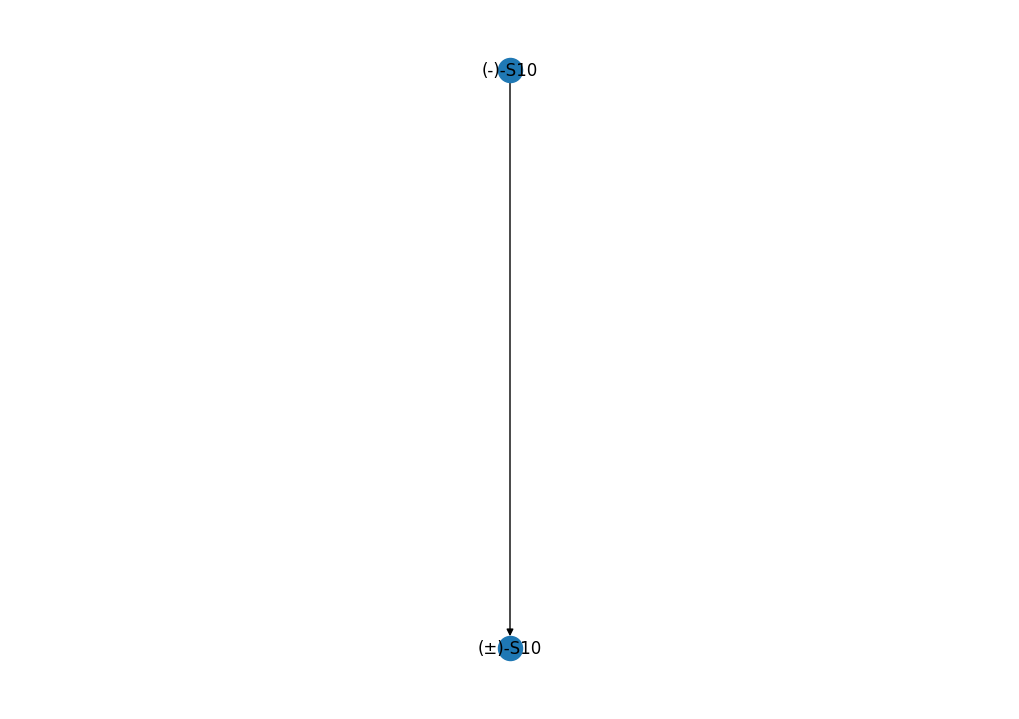

['(±)-S10', '(-)-S10']
(+)-22a


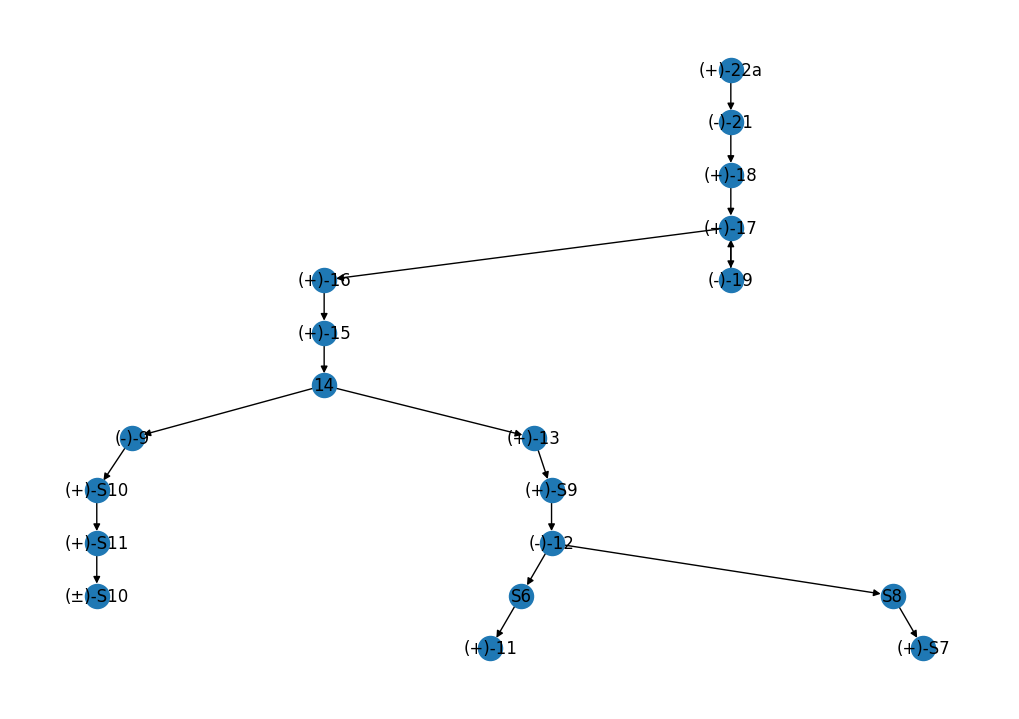

['(-)-21', '(-)-9', 'S6', '(+)-16', '(+)-S10', '(+)-18', 'S8', '(+)-17', '(+)-13', '(+)-15', '(+)-S7', '(-)-12', '(-)-19', '(+)-22a', '(+)-S9', '14', '(+)-S11', '(±)-S10', '(+)-11']
(+)-22b


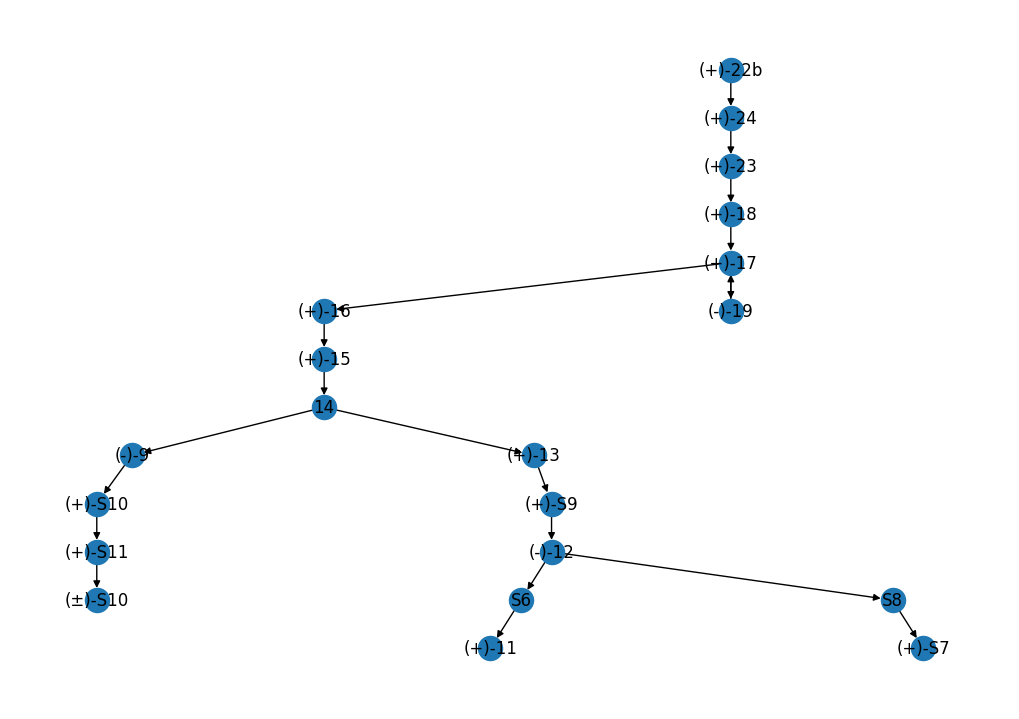

['(-)-9', 'S6', '(+)-16', '(+)-S10', '(+)-18', 'S8', '(+)-24', '(+)-17', '(+)-13', '(+)-15', '(+)-S7', '(+)-22b', '(-)-12', '(-)-19', '(+)-S9', '14', '(+)-23', '(+)-S11', '(±)-S10', '(+)-11']
(-)-25a


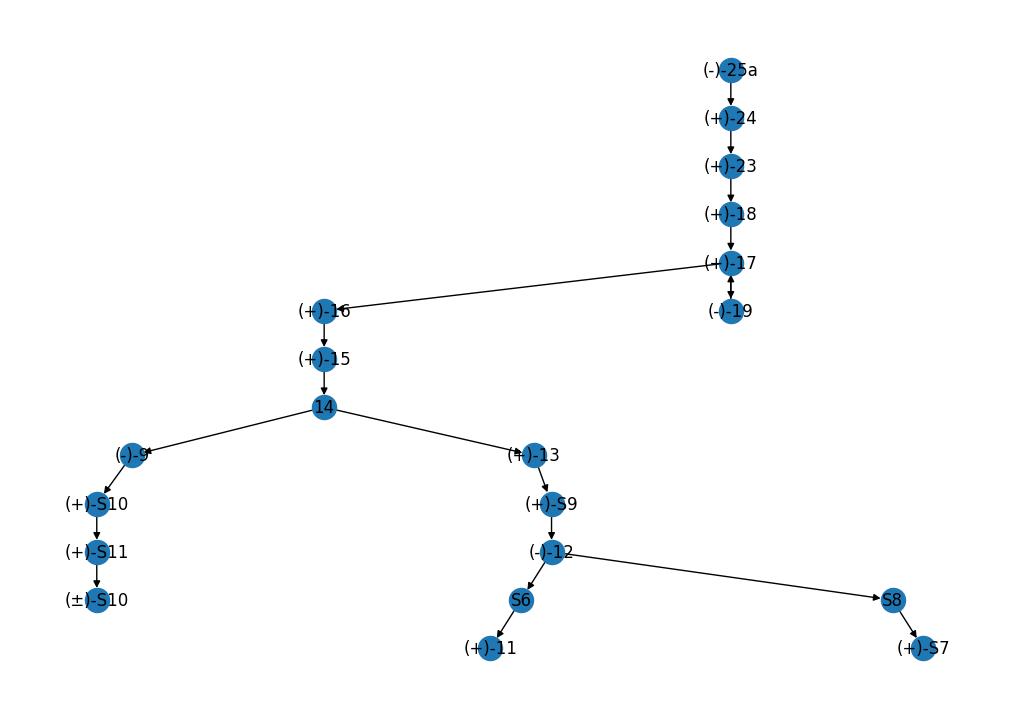

['(-)-9', 'S6', '(+)-16', '(+)-S10', '(+)-18', 'S8', '(+)-24', '(+)-17', '(+)-13', '(+)-15', '(+)-S7', '(-)-12', '(-)-19', '(+)-S9', '(-)-25a', '14', '(+)-23', '(+)-S11', '(±)-S10', '(+)-11']
(+)-26


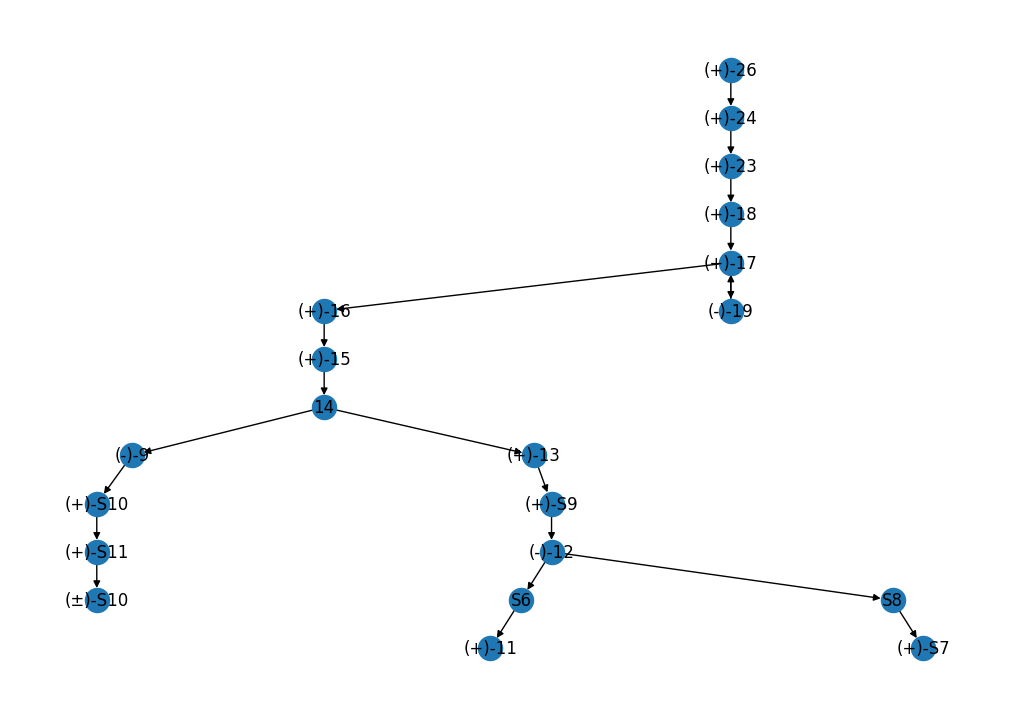

['(-)-9', 'S6', '(+)-16', '(+)-S10', '(+)-26', '(+)-18', 'S8', '(+)-24', '(+)-17', '(+)-13', '(+)-15', '(+)-S7', '(-)-12', '(-)-19', '(+)-S9', '14', '(+)-23', '(+)-S11', '(±)-S10', '(+)-11']
(+)-27


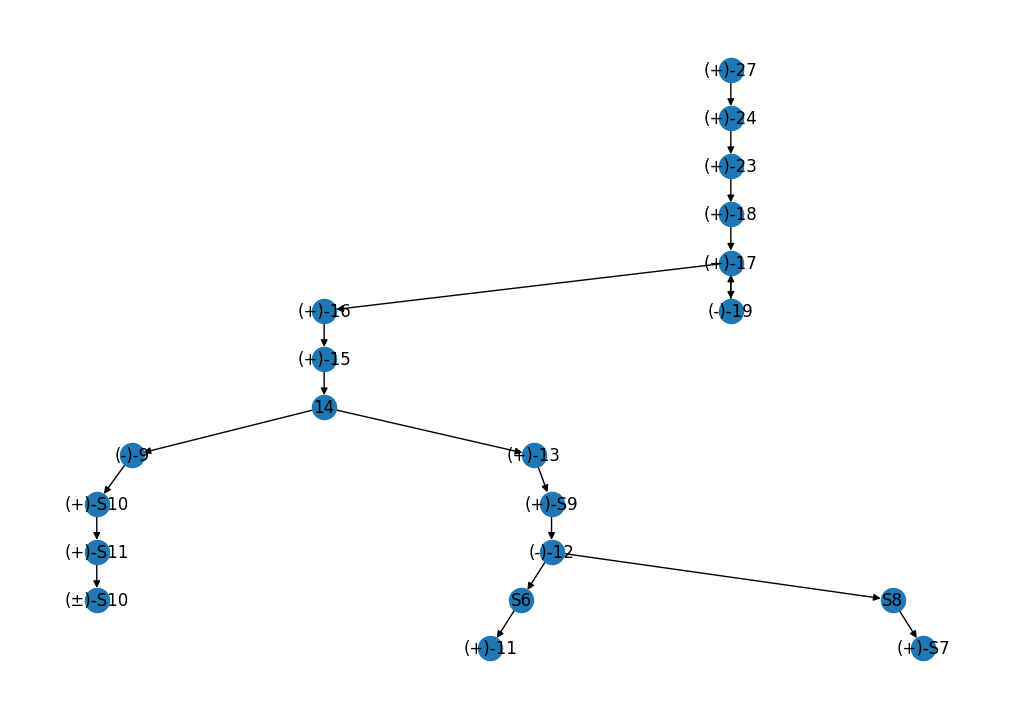

['(-)-9', 'S6', '(+)-16', '(+)-S10', '(+)-27', '(+)-18', 'S8', '(+)-24', '(+)-17', '(+)-13', '(+)-15', '(+)-S7', '(-)-12', '(-)-19', '(+)-S9', '14', '(+)-23', '(+)-S11', '(±)-S10', '(+)-11']
(+)-d-26


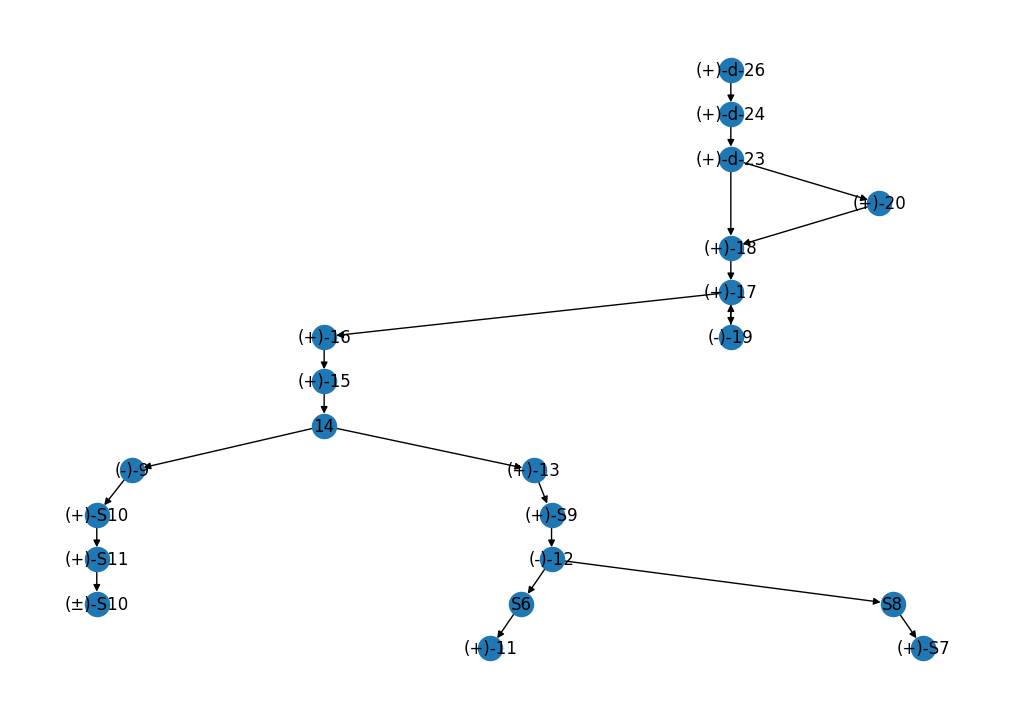

['(-)-9', 'S6', '(+)-16', '(+)-S10', '(+)-d-26', '(+)-18', 'S8', '(+)-17', '(+)-13', '(+)-d-23', '(+)-15', '(+)-S7', '(-)-12', '(-)-19', '(+)-S9', '(+)-20', '14', '(+)-S11', '(±)-S10', '(+)-d-24', '(+)-11']
(-)-d-25a


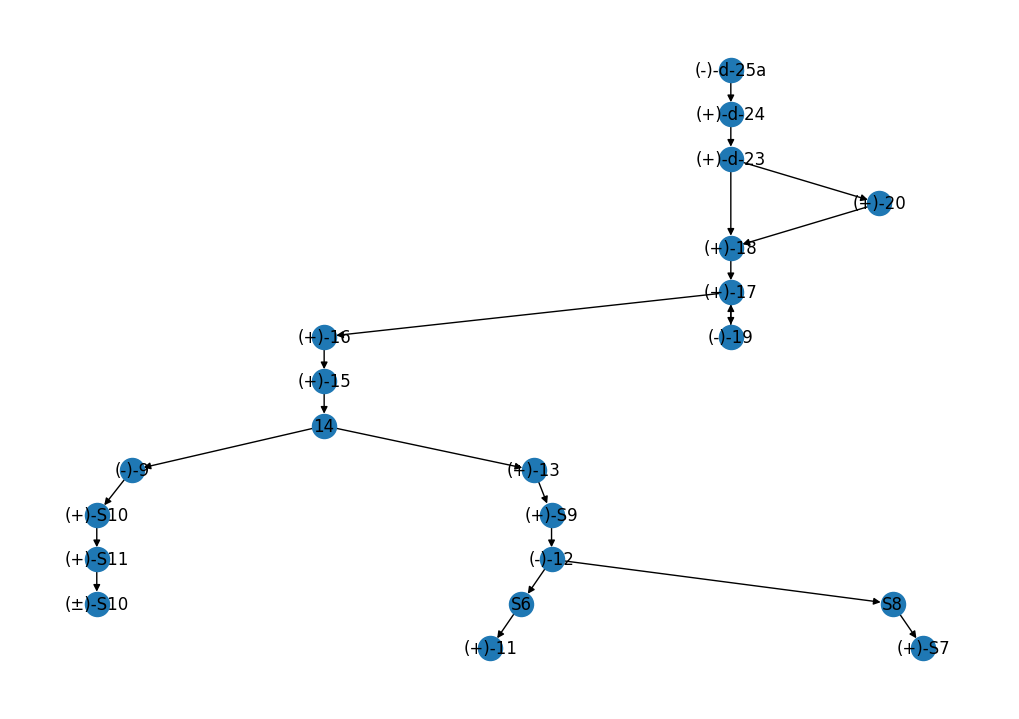

['(-)-9', 'S6', '(+)-16', '(+)-S10', '(+)-18', 'S8', '(+)-17', '(+)-13', '(+)-d-23', '(+)-15', '(+)-S7', '(-)-12', '(-)-19', '(-)-d-25a', '(+)-S9', '(+)-20', '14', '(+)-S11', '(±)-S10', '(+)-d-24', '(+)-11']
(+)-2


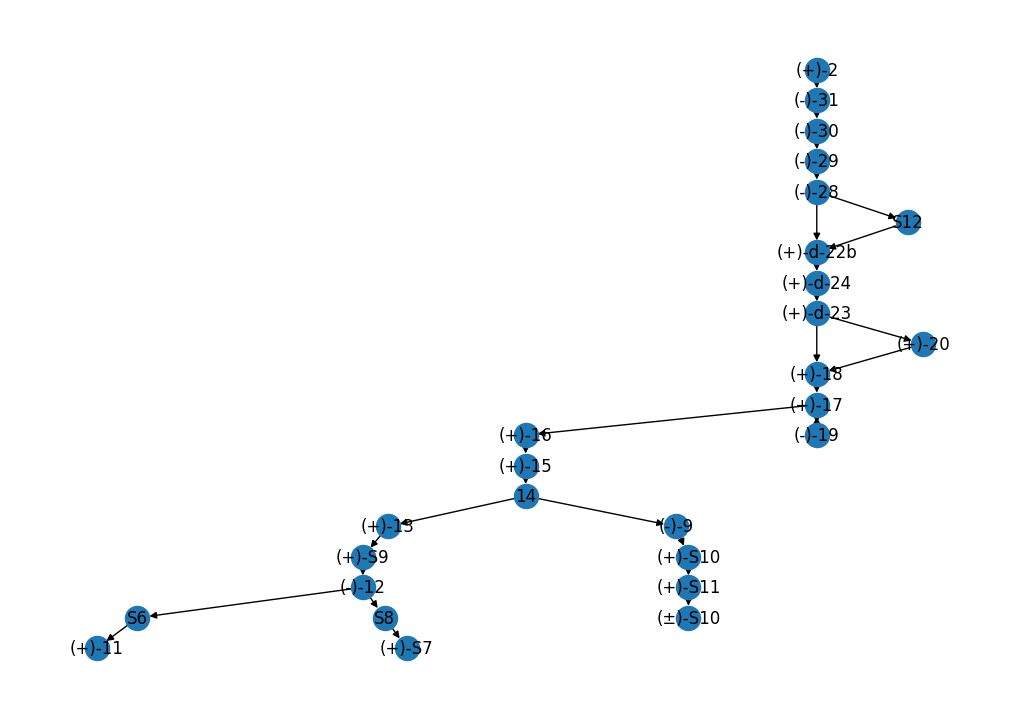

['S6', '(+)-11', '(-)-12', 'S8', '(+)-S7', '(+)-S9', '(+)-13', '(±)-S10', '(+)-S11', '(+)-S10', '(-)-9', '14', '(+)-15', '(+)-16', '(+)-17', '(-)-19', '(+)-18', '(+)-20', '(+)-d-23', '(+)-d-24', '(+)-d-22b', 'S12', '(-)-28', '(-)-29', '(-)-30', '(-)-31', '(+)-2']
(+)-S13


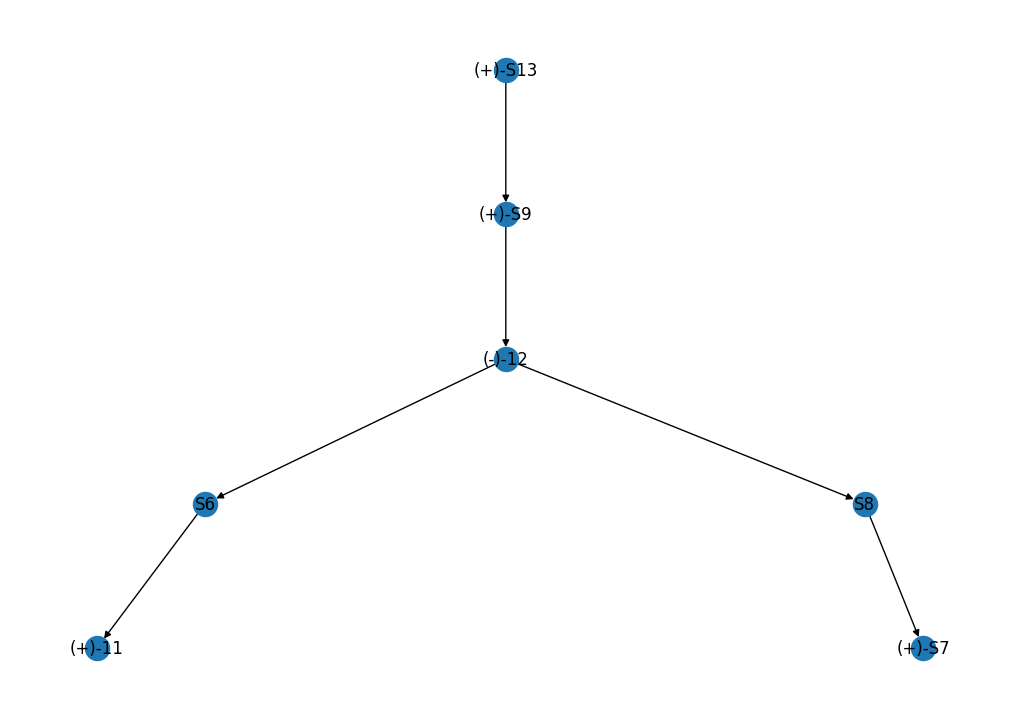

['(+)-S7', '(-)-12', 'S6', '(+)-S9', '(+)-S13', '(+)-11', 'S8']
(-)-S14


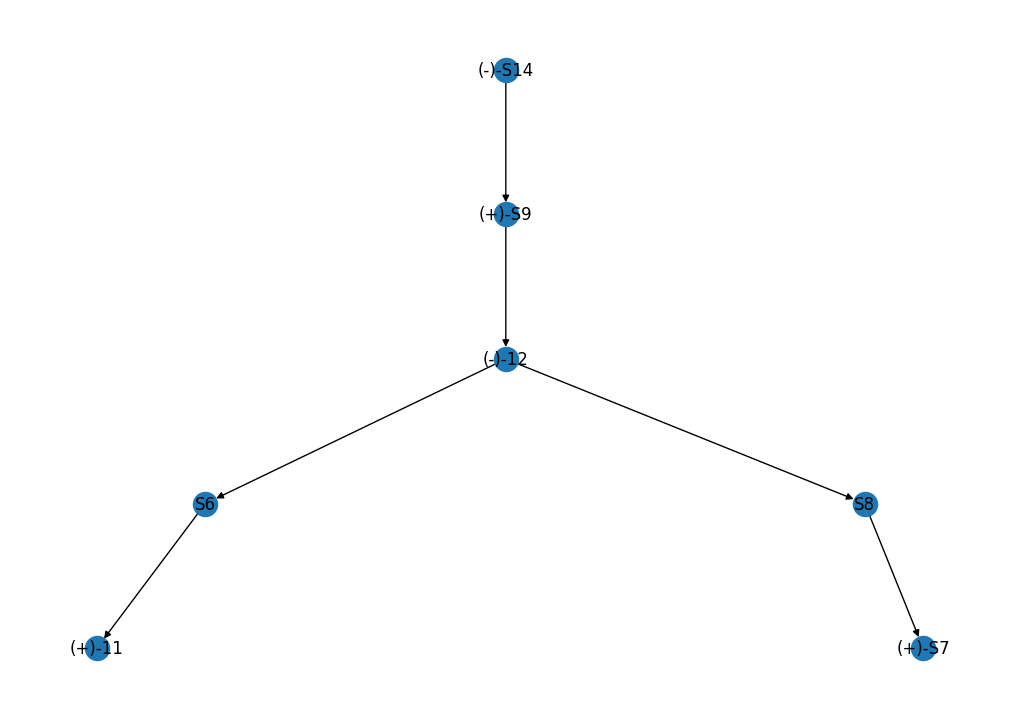

['(+)-S7', '(-)-12', 'S6', '(-)-S14', '(+)-S9', '(+)-11', 'S8']
1


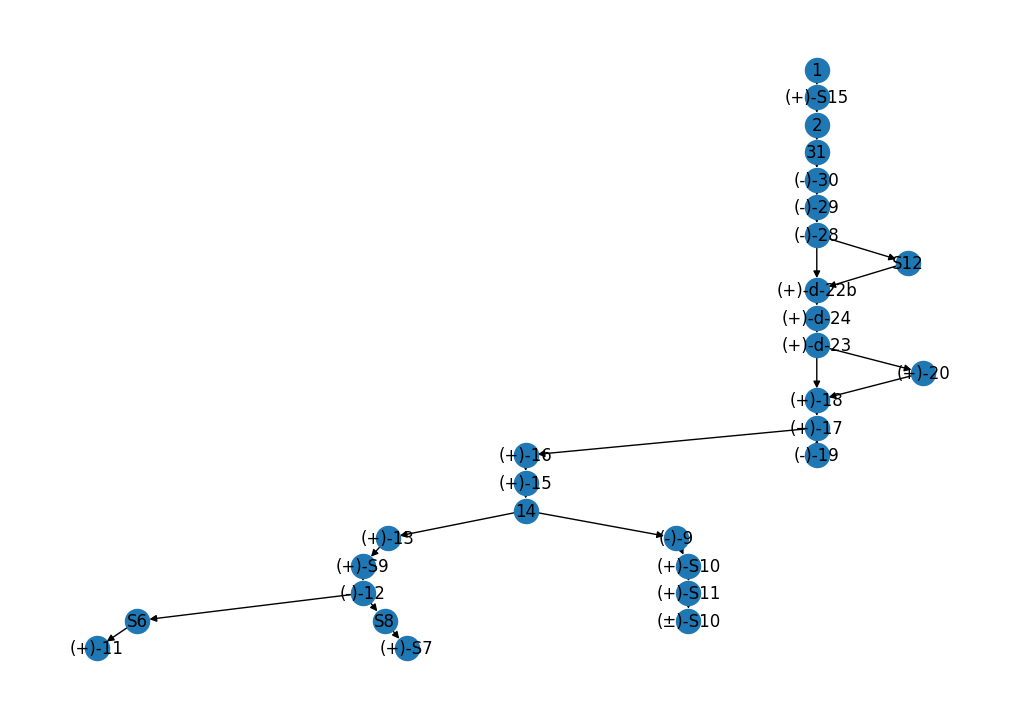

['S6', '(+)-11', '(-)-12', 'S8', '(+)-S7', '(+)-S9', '(+)-13', '(±)-S10', '(+)-S11', '(+)-S10', '(-)-9', '14', '(+)-15', '(+)-16', '(+)-17', '(-)-19', '(+)-18', '(+)-20', '(+)-d-23', '(+)-d-24', '(+)-d-22b', 'S12', '(-)-28', '(-)-29', '(-)-30', '(+)-S15', '2', '1', '31']


In [130]:
path = "../benchmark/papers/jacs.2c06934"

l = [
    ("(+)-11", "S6"),
    ("S6", "(-)-12"),
    ("(+)-S7", "S8"),
    ("S8", "(-)-12"),
    ("(-)-12", "(+)-S9"),
    ("(+)-S9", "(+)-13"),
    ("(±)-S10", "(-)-S10"),
    ("(±)-S10", "(+)-S11"),
    ("(+)-S11", "(+)-S10"),
    ("(+)-S10", "(-)-9"),
    ("(+)-13", "14"),
    ("(-)-9", "14"),
    ("14", "(+)-15"),
    ("(+)-15", "(+)-16"),
    ("(+)-16", "(+)-17"),
    ("(+)-17", "(-)-19"),
    ("(+)-17", "(+)-18"),
    ("(-)-19", "(+)-17"),
    ("(+)-18", "(+)-20"),
    ("(+)-18", "(-)-21"),
    ("(-)-21", "(+)-22a"),
    ("(+)-18", "(+)-23"),
    ("(+)-18", "(+)-d-23"),
    ("(+)-23", "(+)-24"),
    ("(+)-d-23", "(+)-d-24"),
    ("(+)-24", "(+)-22b"),
    ("(+)-24", "(-)-25a"),
    ("(+)-24", "(+)-26"),
    ("(+)-24", "(+)-27"),
    ("(+)-d-24", "(+)-d-26"),
    ("(+)-d-24", "(-)-d-25a"),
    ("(+)-d-24", "(+)-d-22b"),
    ("(+)-d-22b", "S12"),
    ("S12", "(-)-28"),
    ("(-)-28", "(-)-29"),
    ("(-)-29", "(-)-30"),
    ("(+)-d-22b", "(-)-28"),
    ("(-)-30", "(-)-31"),
    ("(-)-31", "(+)-2"),
    ("(+)-S9", "(+)-S13"),
    ("(+)-S9", "(-)-S14"),
    ("2", "(+)-S15"),
    ("(+)-S15", "1"),
    ("31", "2"),
    ("(-)-30", "31"),
    ("(-)-29", "(-)-30"),
    ("(-)-28", "(-)-29"),
    ("(+)-d-22b", "S12"),
    ("S12", "(-)-28"),
    ("(+)-d-24", "(-)-d-25a"),
    ("(+)-d-24", "(+)-d-26"),
    ("(+)-d-24", "(+)-d-22b"),
    ("(+)-d-23", "(+)-d-24"),
    ("(+)-18", "(+)-20"),
    ("(+)-20", "(+)-d-23"),
]

nd = [(f[1], f[0]) for f in l]

dg = nx.DiGraph()
dg.add_edges_from(nd)

rsgs = SynthTree.get_reach_subgraphs(dg)
print(len(rsgs))


for k, g in rsgs.items():
    # if len(g) > 1:
    if not any(map(lambda x: x in g, gthn)):
        print(k)
        plot_graph(g)
        print(g.nodes)

with open(os.path.join(path, "gt_graph.pickle"), "wb") as f:
    pickle.dump(dg, f)

35
Pleuromutilin


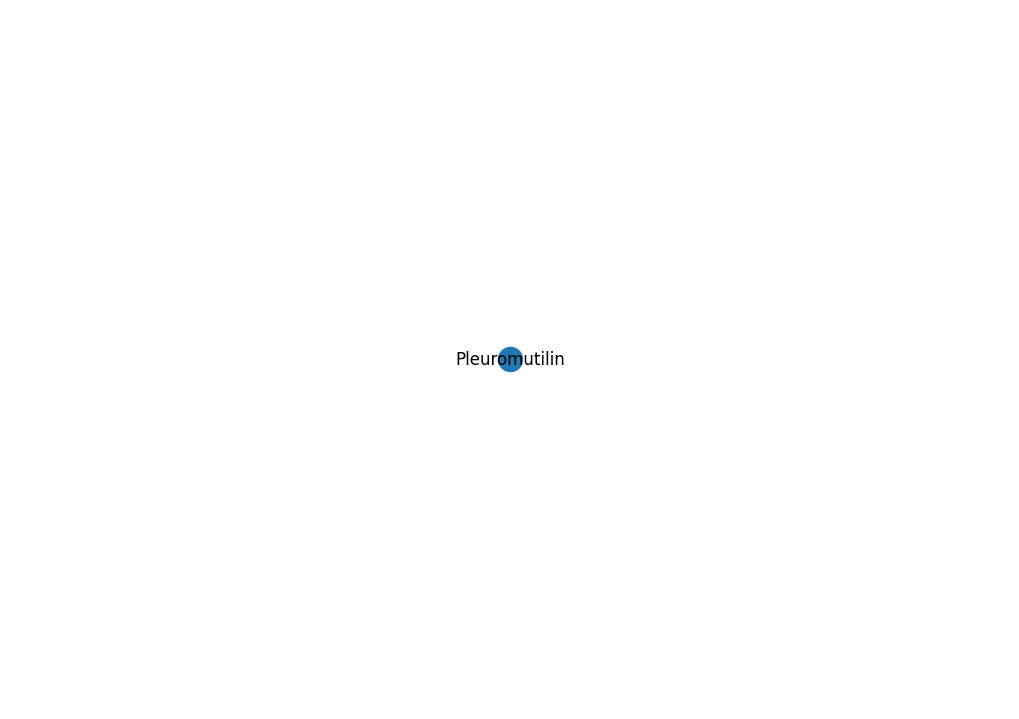

['Pleuromutilin']
S5


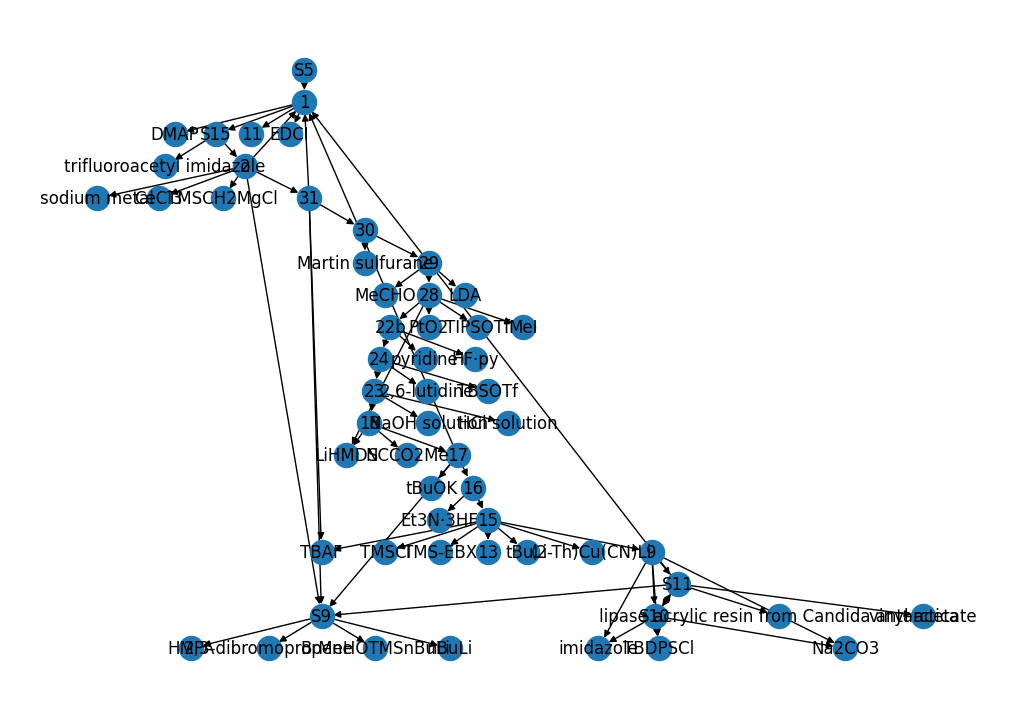

['S5', '1', '2', 'CeCl3', 'TMSCH2MgCl', 'S9', 'BrMeHOTMSnBuLi', 'nBuLi', 'HMPA', '2,3-dibromopropene', 'S11', 'S10', 'vinyl acetate', 'lipase acrylic resin from Candida antarctica', 'Na2CO3', 'imidazole', 'TBDPSCl', '9', '15', '13', 'tBuLi', '(2-Th)Cu(CN)Li', 'TMSCl', 'TMS-EBX', 'TBAF', '16', 'Et3N·3HF', '17', 'tBuOK', '18', 'LiHMDS', 'NCCO2Me', 'NaOH solution', '23', 'HCl solution', '24', '2,6-lutidine', 'TBSOTf', '22b', 'pyridine', 'HF·py', '28', 'PtO2', 'TIPSOTf', 'MeI', '29', 'LDA', 'MeCHO', '30', 'Martin sulfurane', '31', 'sodium metal', 'DMAP', 'S15', 'trifluoroacetyl imidazole', '11', 'EDCI']
12


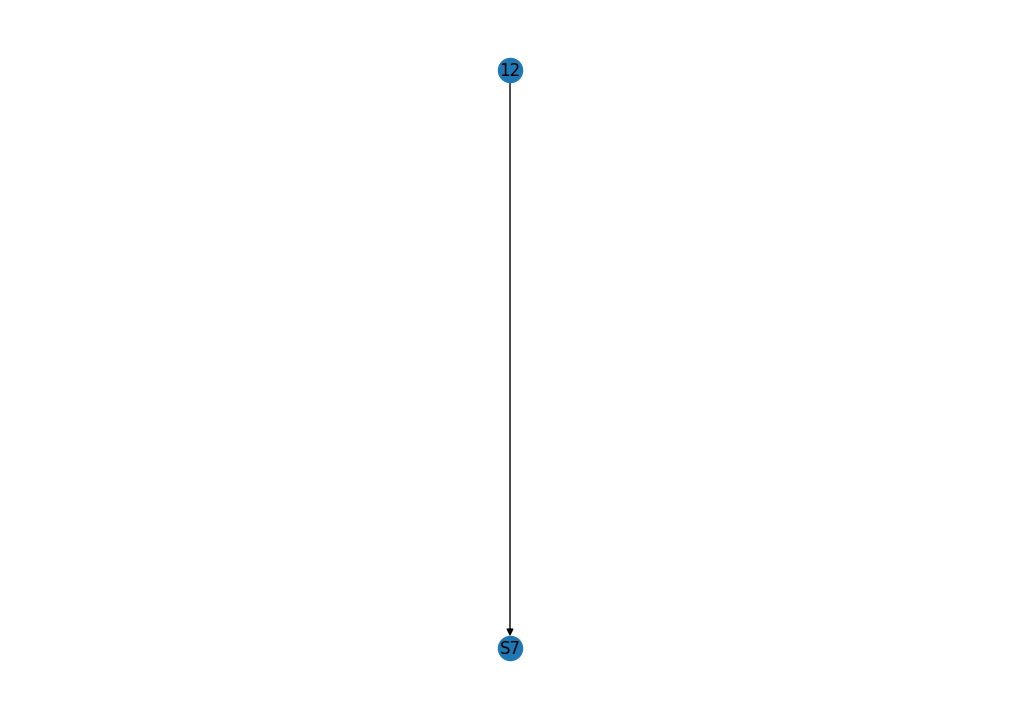

['S7', '12']
C8H18OSi


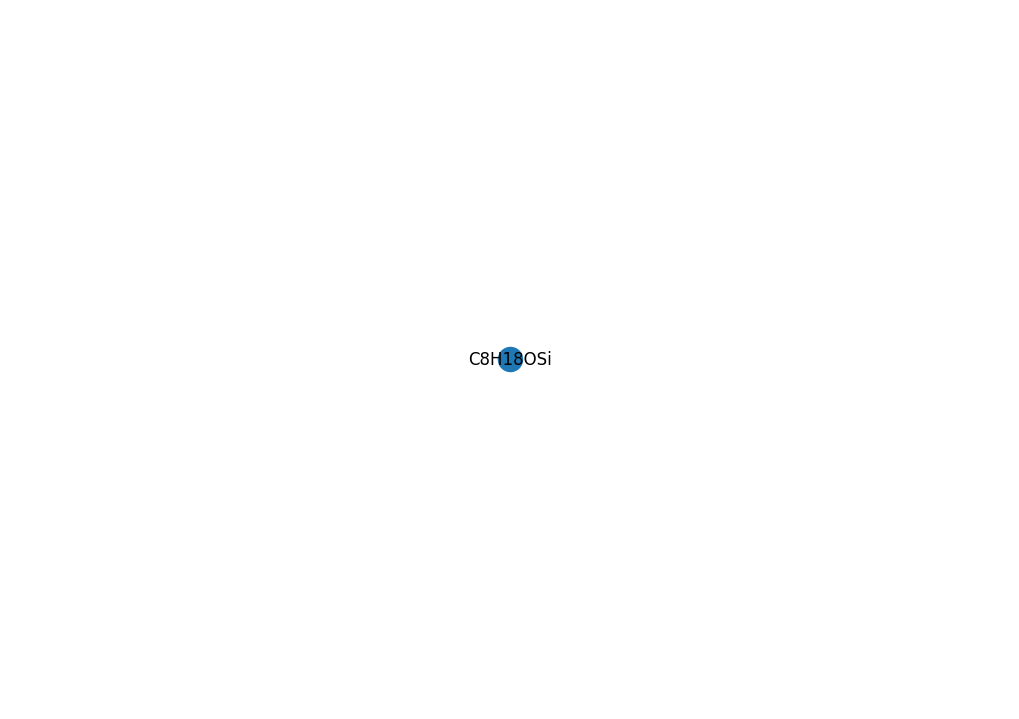

['C8H18OSi']
19


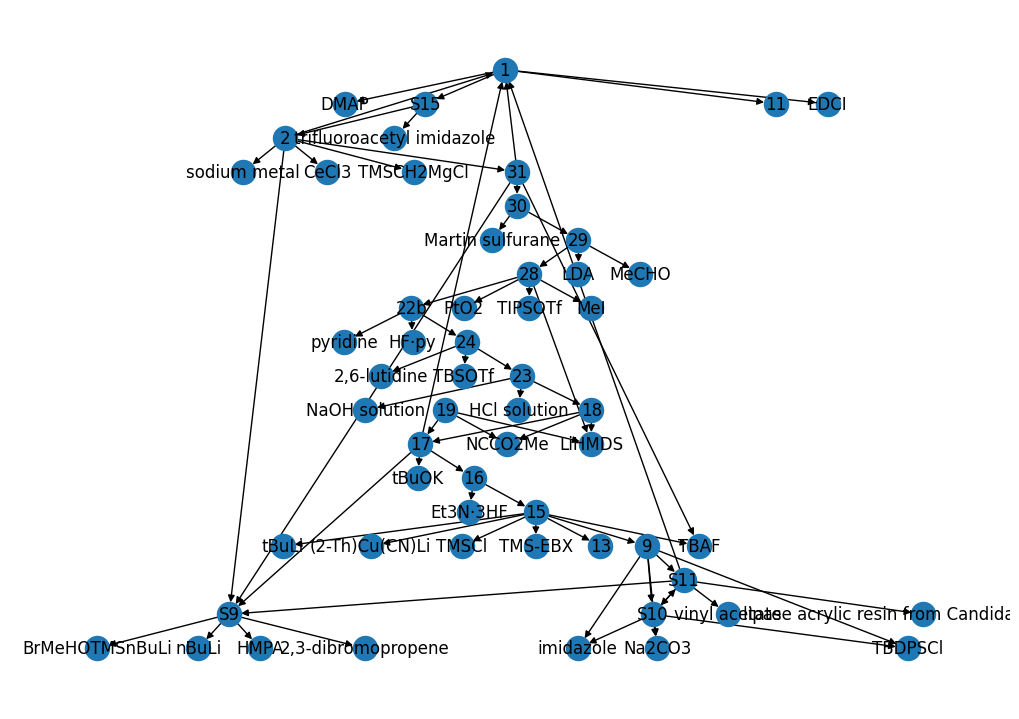

['1', '2', 'CeCl3', 'TMSCH2MgCl', 'S9', 'BrMeHOTMSnBuLi', 'nBuLi', 'HMPA', '2,3-dibromopropene', 'S11', 'S10', 'vinyl acetate', 'lipase acrylic resin from Candida antarctica', 'Na2CO3', 'imidazole', 'TBDPSCl', '9', '15', '13', 'tBuLi', '(2-Th)Cu(CN)Li', 'TMSCl', 'TMS-EBX', 'TBAF', '16', 'Et3N·3HF', '17', 'tBuOK', '18', 'LiHMDS', 'NCCO2Me', '19', 'NaOH solution', '23', 'HCl solution', '24', '2,6-lutidine', 'TBSOTf', '22b', 'pyridine', 'HF·py', '28', 'PtO2', 'TIPSOTf', 'MeI', '29', 'LDA', 'MeCHO', '30', 'Martin sulfurane', '31', 'sodium metal', 'DMAP', 'S15', 'trifluoroacetyl imidazole', '11', 'EDCI']
20


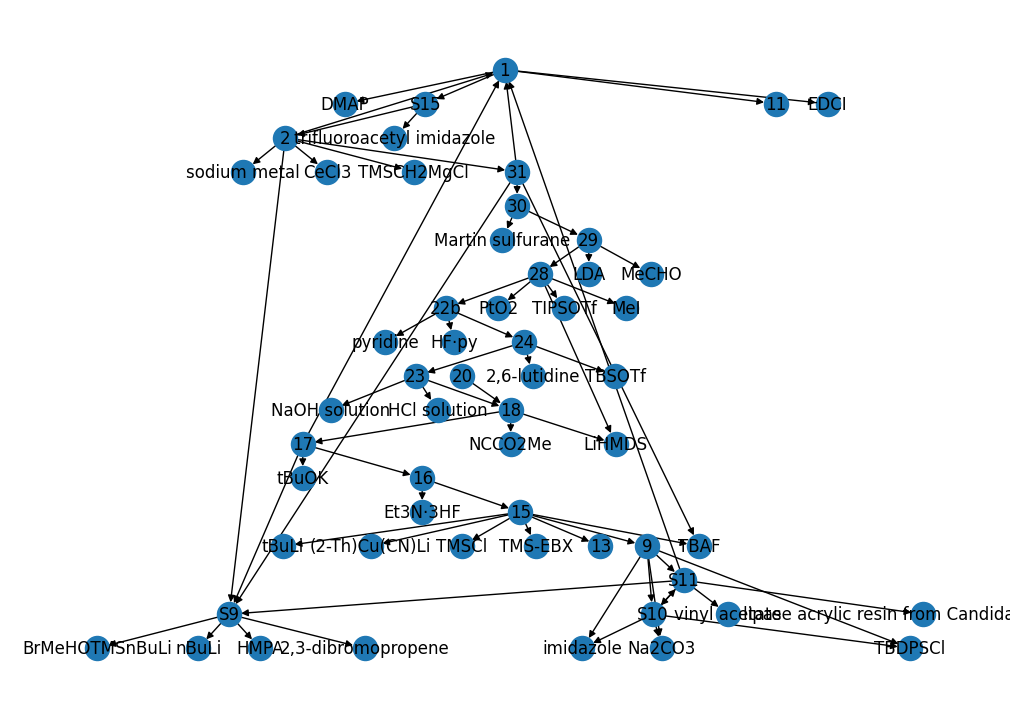

['1', '2', 'CeCl3', 'TMSCH2MgCl', 'S9', 'BrMeHOTMSnBuLi', 'nBuLi', 'HMPA', '2,3-dibromopropene', 'S11', 'S10', 'vinyl acetate', 'lipase acrylic resin from Candida antarctica', 'Na2CO3', 'imidazole', 'TBDPSCl', '9', '15', '13', 'tBuLi', '(2-Th)Cu(CN)Li', 'TMSCl', 'TMS-EBX', 'TBAF', '16', 'Et3N·3HF', '17', 'tBuOK', '18', 'LiHMDS', 'NCCO2Me', '20', 'NaOH solution', '23', 'HCl solution', '24', '2,6-lutidine', 'TBSOTf', '22b', 'pyridine', 'HF·py', '28', 'PtO2', 'TIPSOTf', 'MeI', '29', 'LDA', 'MeCHO', '30', 'Martin sulfurane', '31', 'sodium metal', 'DMAP', 'S15', 'trifluoroacetyl imidazole', '11', 'EDCI']
C34H41O4Si


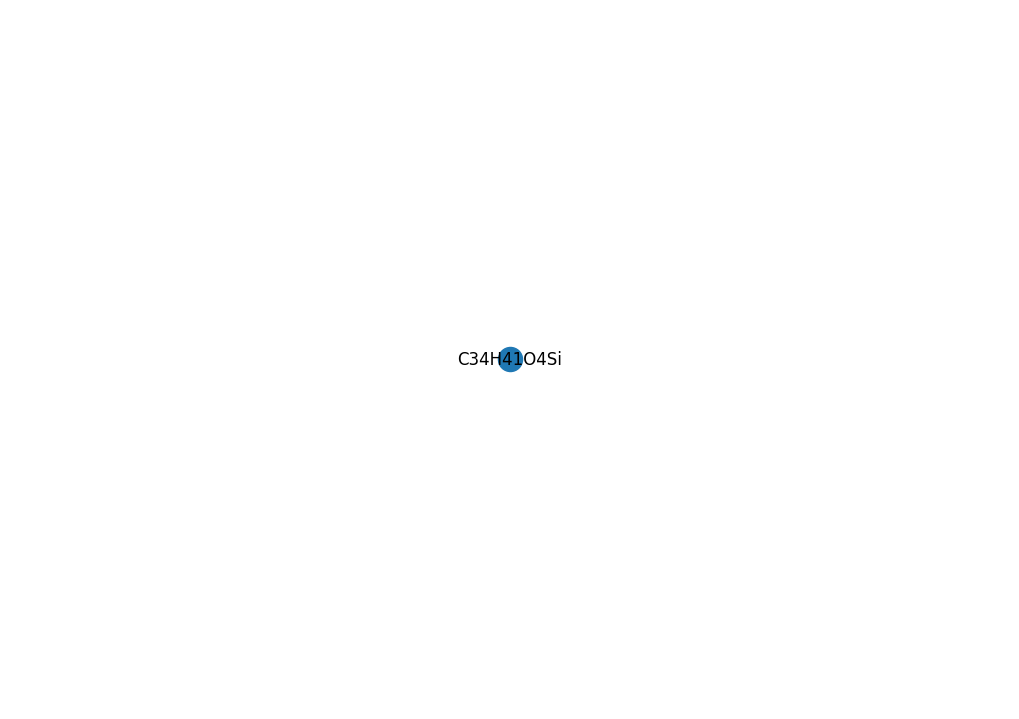

['C34H41O4Si']
22a


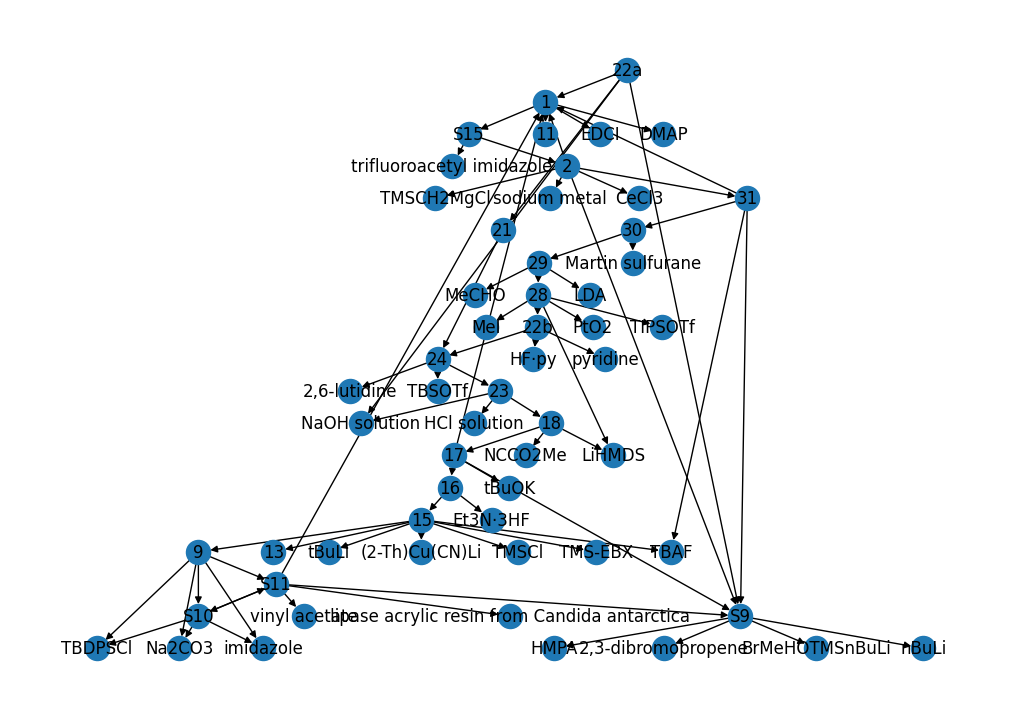

['1', '2', 'CeCl3', 'TMSCH2MgCl', 'S9', 'BrMeHOTMSnBuLi', 'nBuLi', 'HMPA', '2,3-dibromopropene', 'S11', 'S10', 'vinyl acetate', 'lipase acrylic resin from Candida antarctica', 'Na2CO3', 'imidazole', 'TBDPSCl', '9', '15', '13', 'tBuLi', '(2-Th)Cu(CN)Li', 'TMSCl', 'TMS-EBX', 'TBAF', '16', 'Et3N·3HF', '17', 'tBuOK', '18', 'LiHMDS', 'NCCO2Me', '21', '22a', 'NaOH solution', '23', 'HCl solution', '24', '2,6-lutidine', 'TBSOTf', '22b', 'pyridine', 'HF·py', '28', 'PtO2', 'TIPSOTf', 'MeI', '29', 'LDA', 'MeCHO', '30', 'Martin sulfurane', '31', 'sodium metal', 'DMAP', 'S15', 'trifluoroacetyl imidazole', '11', 'EDCI']
C33H39D4O3Si


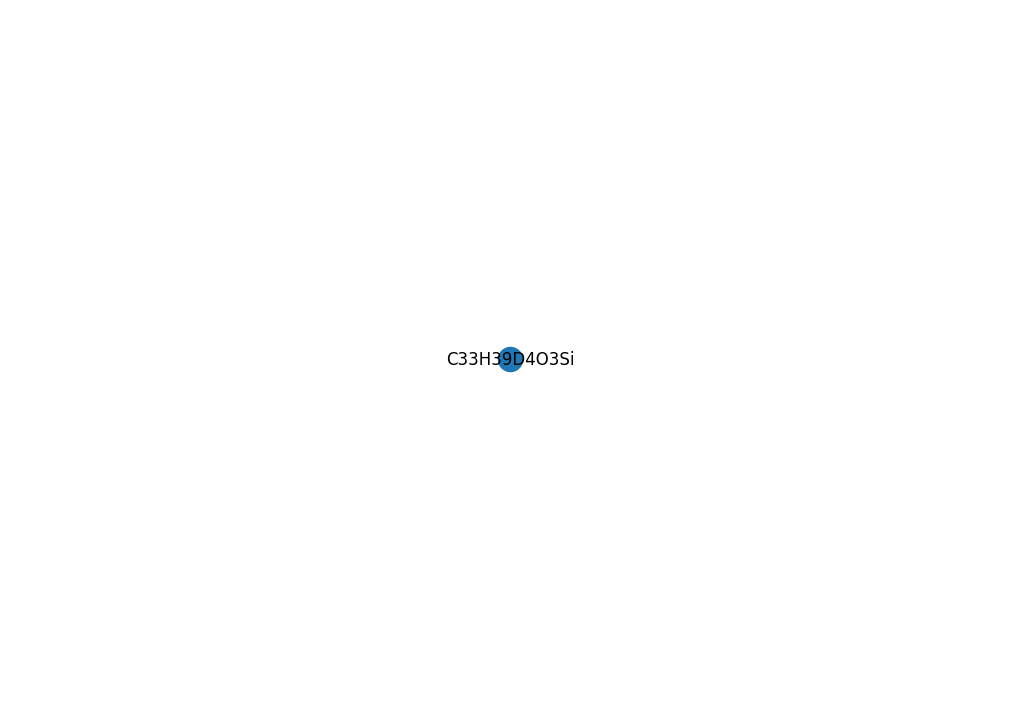

['C33H39D4O3Si']
C33H43O3Si


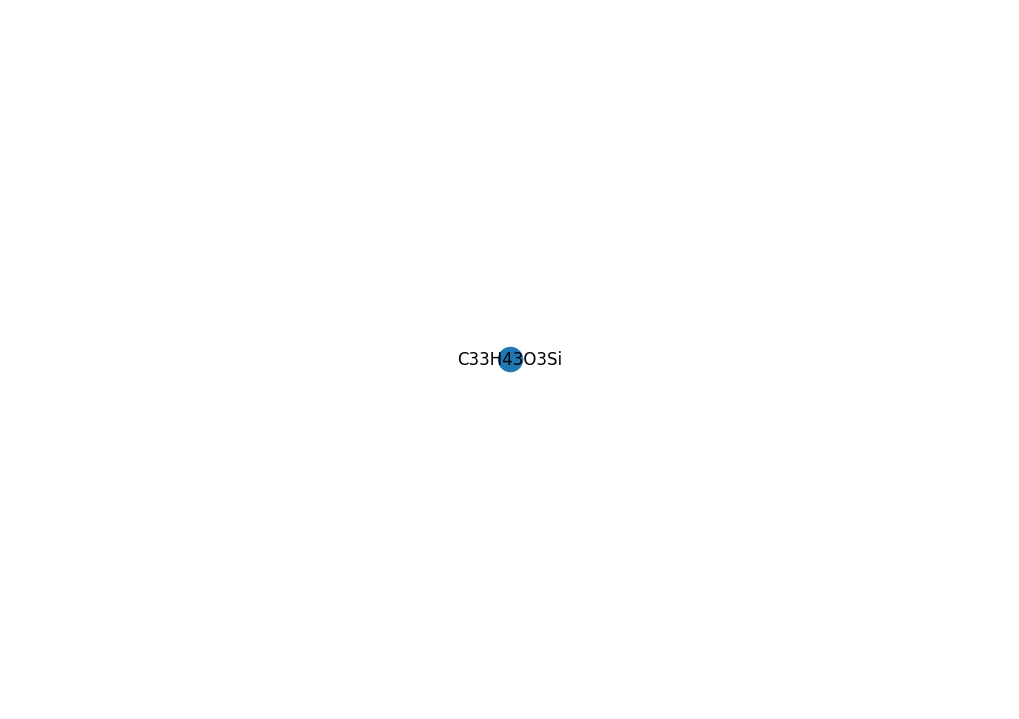

['C33H43O3Si']
C39H57O3Si2


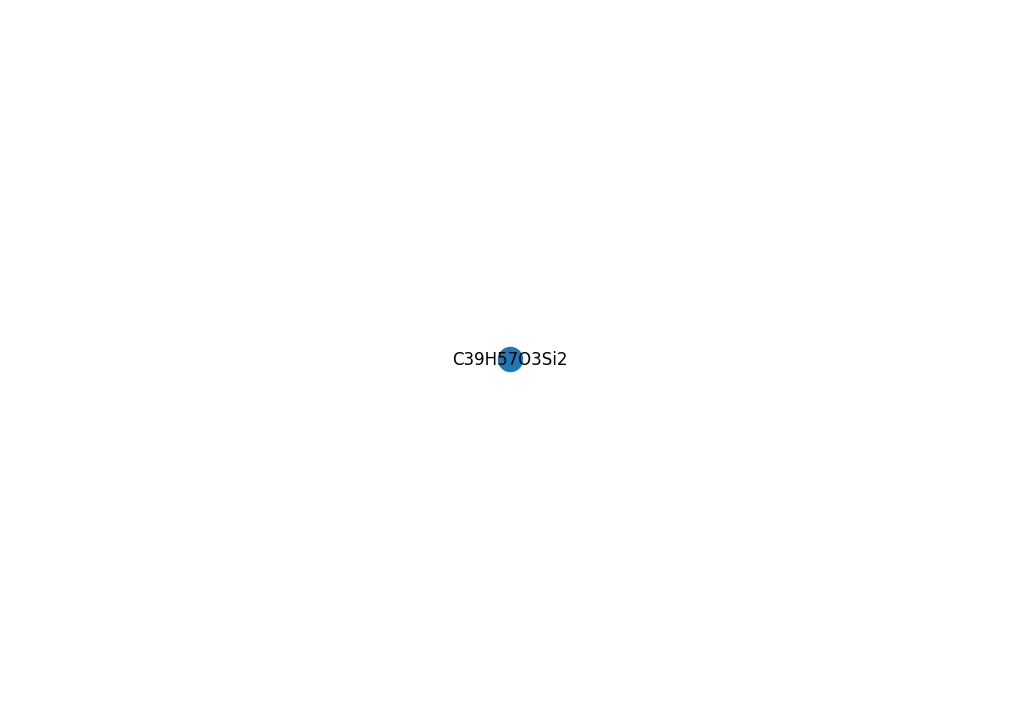

['C39H57O3Si2']
compound from NMR data


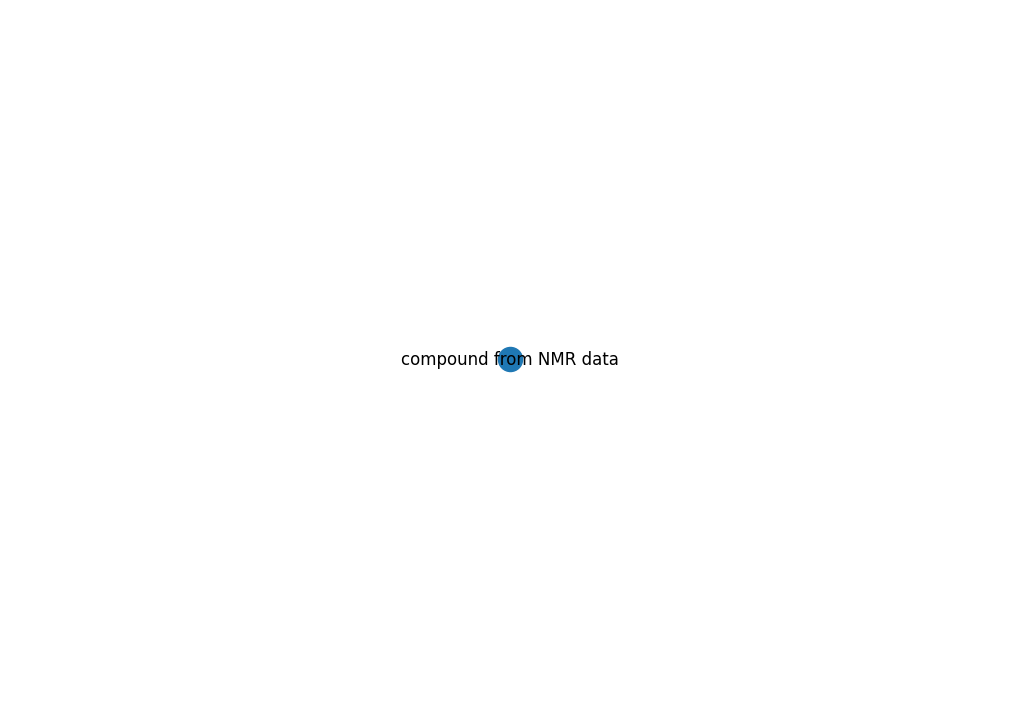

['compound from NMR data']
25a


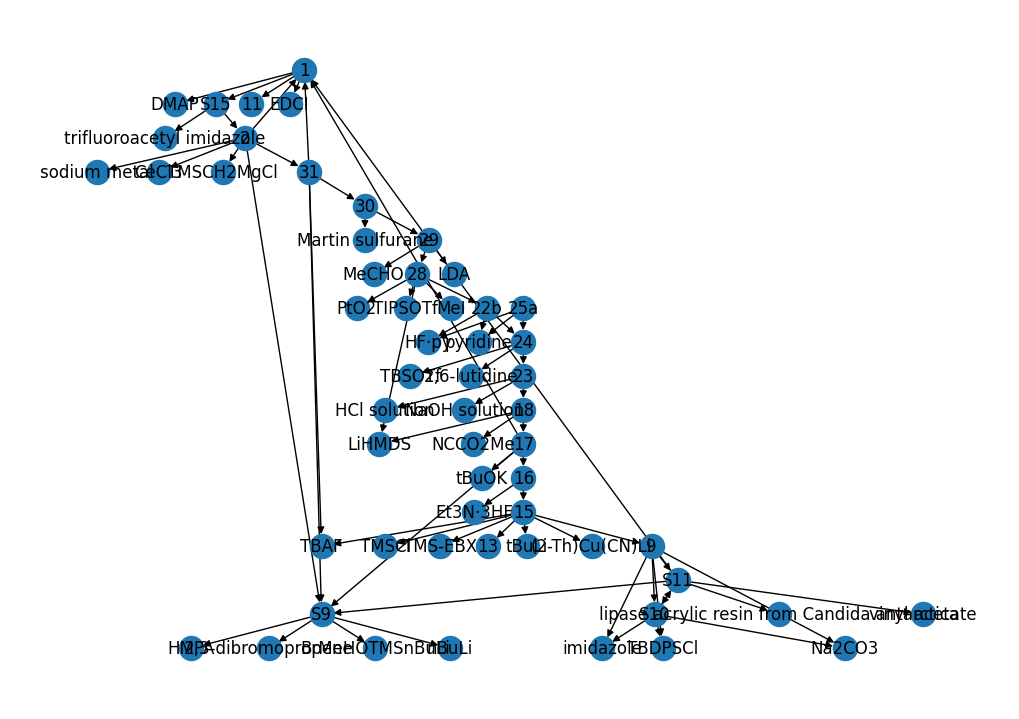

['1', '2', 'CeCl3', 'TMSCH2MgCl', 'S9', 'BrMeHOTMSnBuLi', 'nBuLi', 'HMPA', '2,3-dibromopropene', 'S11', 'S10', 'vinyl acetate', 'lipase acrylic resin from Candida antarctica', 'Na2CO3', 'imidazole', 'TBDPSCl', '9', '15', '13', 'tBuLi', '(2-Th)Cu(CN)Li', 'TMSCl', 'TMS-EBX', 'TBAF', '16', 'Et3N·3HF', '17', 'tBuOK', '18', 'LiHMDS', 'NCCO2Me', 'NaOH solution', '23', 'HCl solution', '24', '2,6-lutidine', 'TBSOTf', '22b', 'pyridine', 'HF·py', '25a', '28', 'PtO2', 'TIPSOTf', 'MeI', '29', 'LDA', 'MeCHO', '30', 'Martin sulfurane', '31', 'sodium metal', 'DMAP', 'S15', 'trifluoroacetyl imidazole', '11', 'EDCI']
26


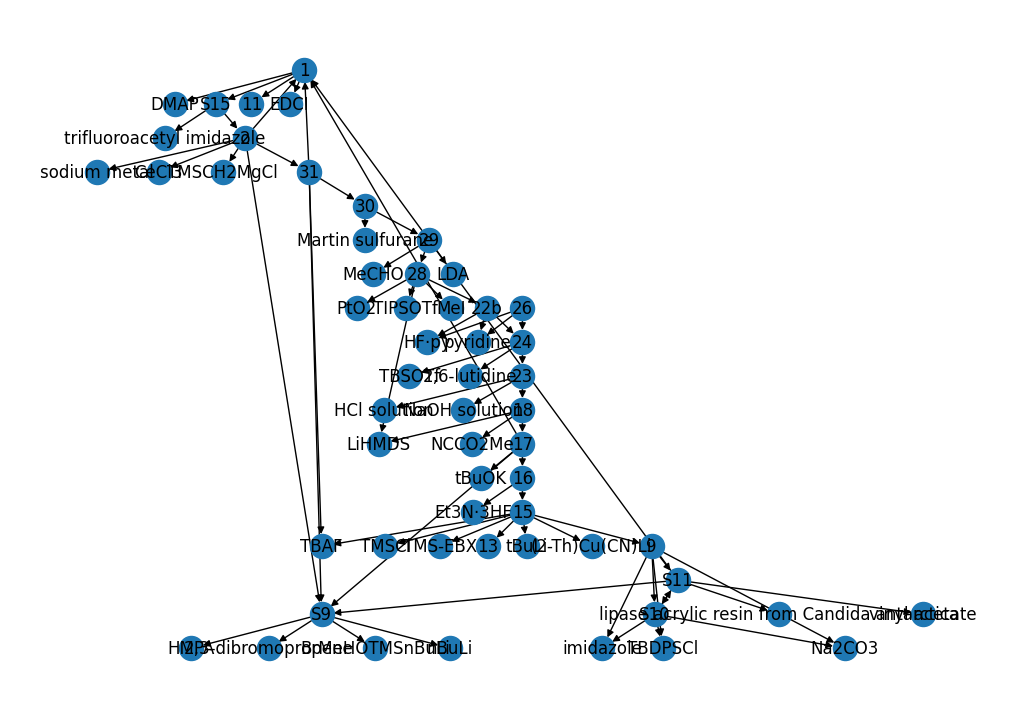

['1', '2', 'CeCl3', 'TMSCH2MgCl', 'S9', 'BrMeHOTMSnBuLi', 'nBuLi', 'HMPA', '2,3-dibromopropene', 'S11', 'S10', 'vinyl acetate', 'lipase acrylic resin from Candida antarctica', 'Na2CO3', 'imidazole', 'TBDPSCl', '9', '15', '13', 'tBuLi', '(2-Th)Cu(CN)Li', 'TMSCl', 'TMS-EBX', 'TBAF', '16', 'Et3N·3HF', '17', 'tBuOK', '18', 'LiHMDS', 'NCCO2Me', 'NaOH solution', '23', 'HCl solution', '24', '2,6-lutidine', 'TBSOTf', '22b', 'pyridine', 'HF·py', '26', '28', 'PtO2', 'TIPSOTf', 'MeI', '29', 'LDA', 'MeCHO', '30', 'Martin sulfurane', '31', 'sodium metal', 'DMAP', 'S15', 'trifluoroacetyl imidazole', '11', 'EDCI']
C39H53D4O3Si2


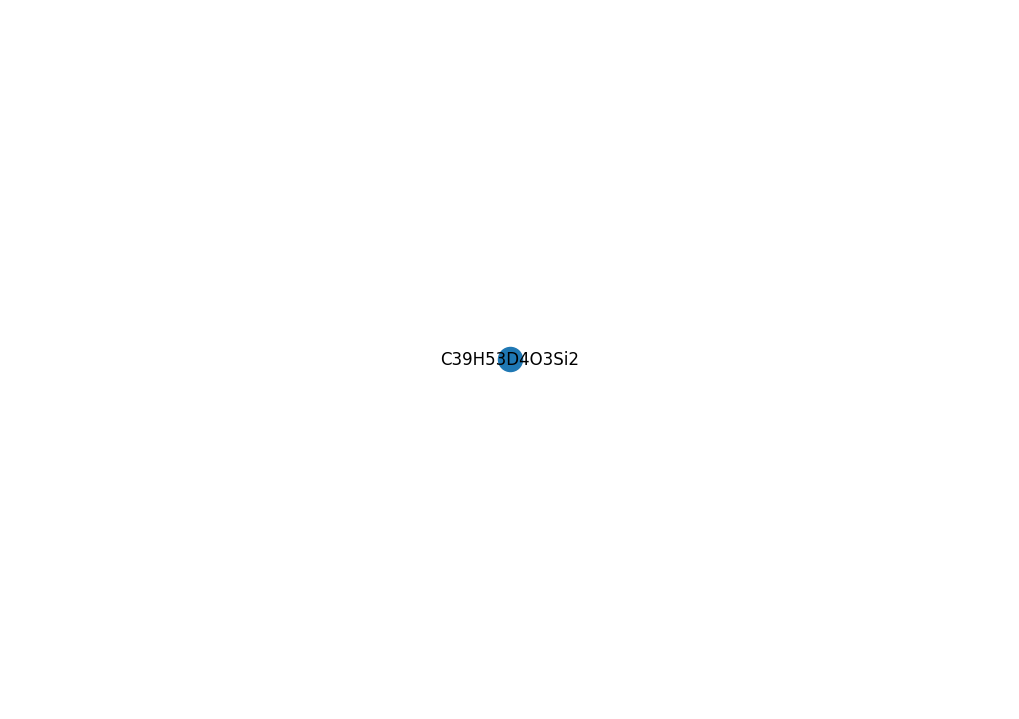

['C39H53D4O3Si2']
Sample


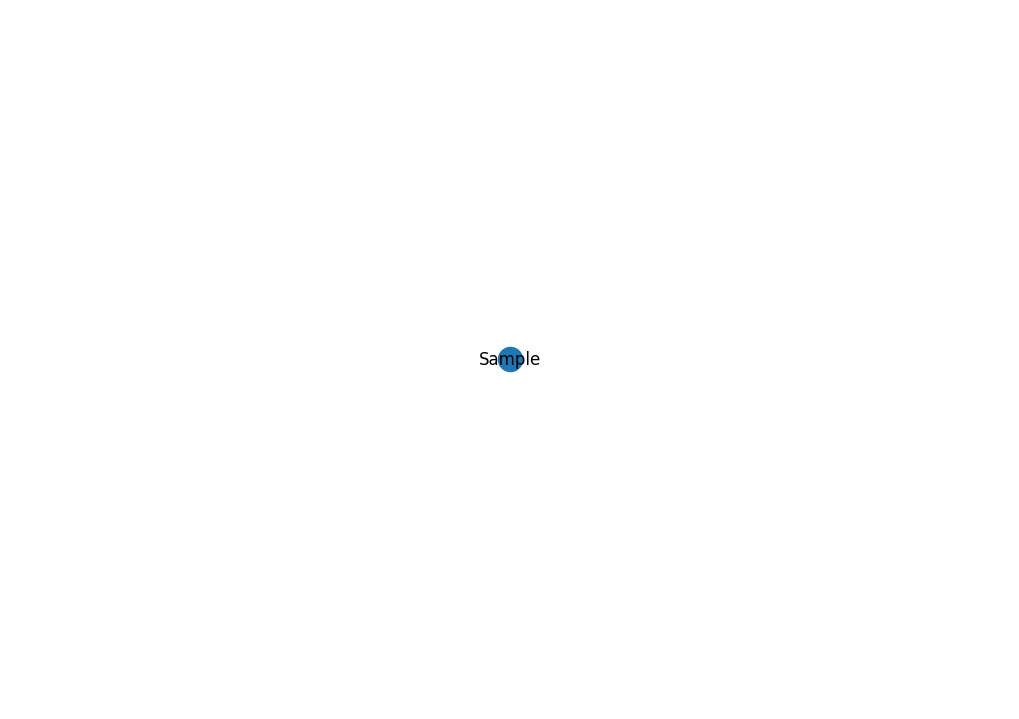

['Sample']
S13


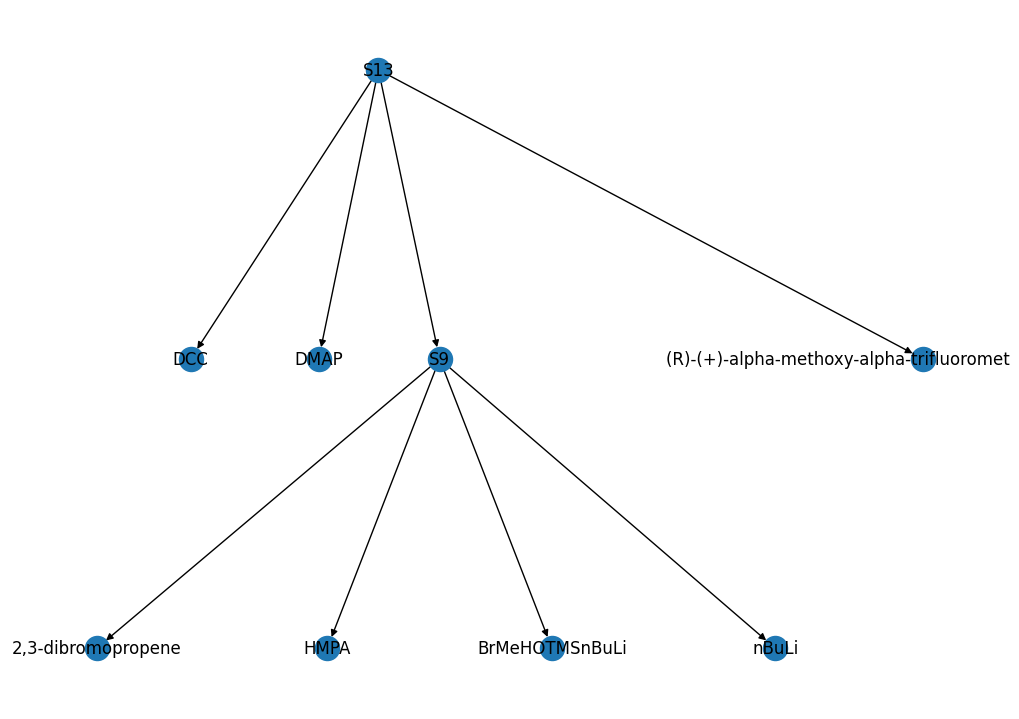

['2,3-dibromopropene', 'S13', 'HMPA', 'DCC', 'DMAP', 'S9', '(R)-(+)-alpha-methoxy-alpha-trifluoromethylphenylacetic acid', 'BrMeHOTMSnBuLi', 'nBuLi']
C18H20BrF3NaO3


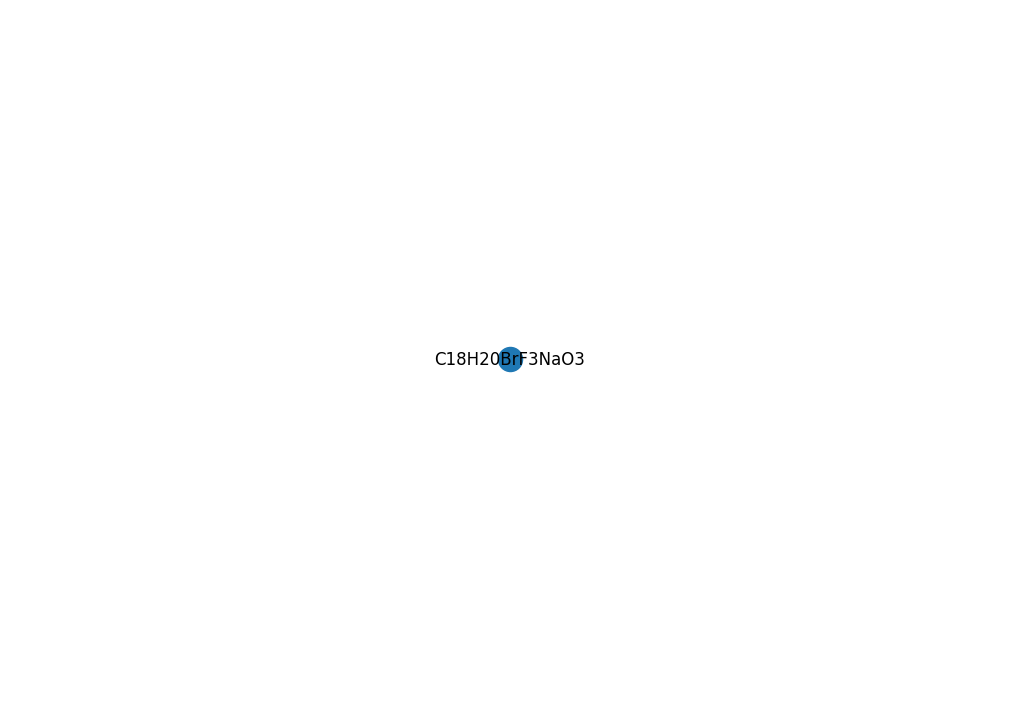

['C18H20BrF3NaO3']
fluorine-containing compound


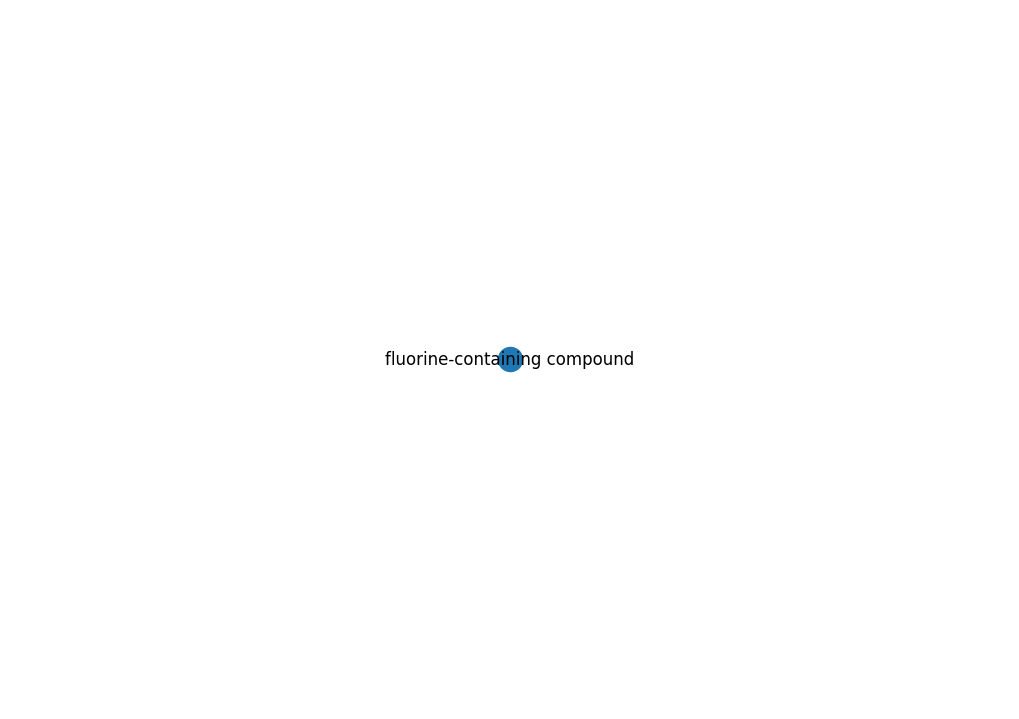

['fluorine-containing compound']
S14


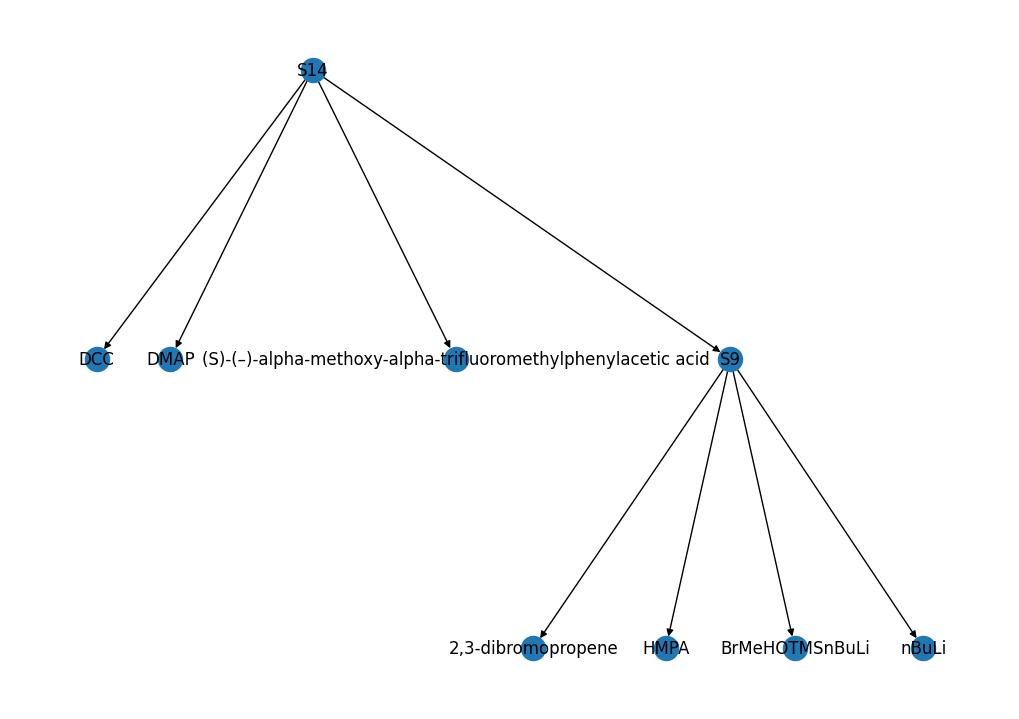

['2,3-dibromopropene', 'HMPA', 'DCC', 'DMAP', '(S)-(–)-alpha-methoxy-alpha-trifluoromethylphenylacetic acid', 'S9', 'S14', 'BrMeHOTMSnBuLi', 'nBuLi']
1d


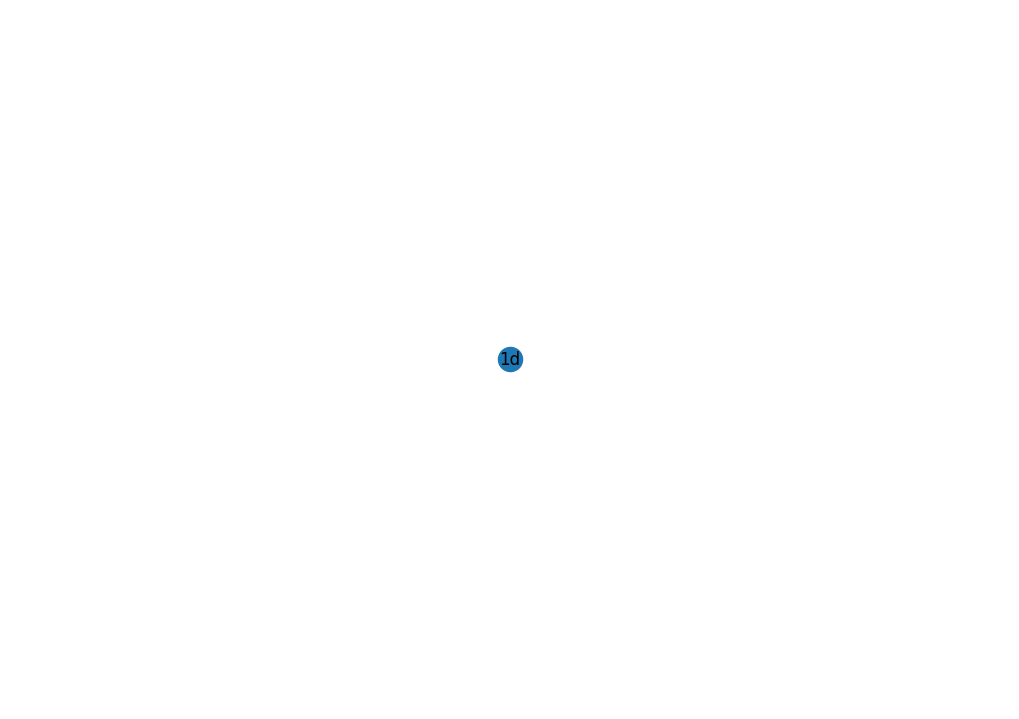

['1d']
cyclobutane


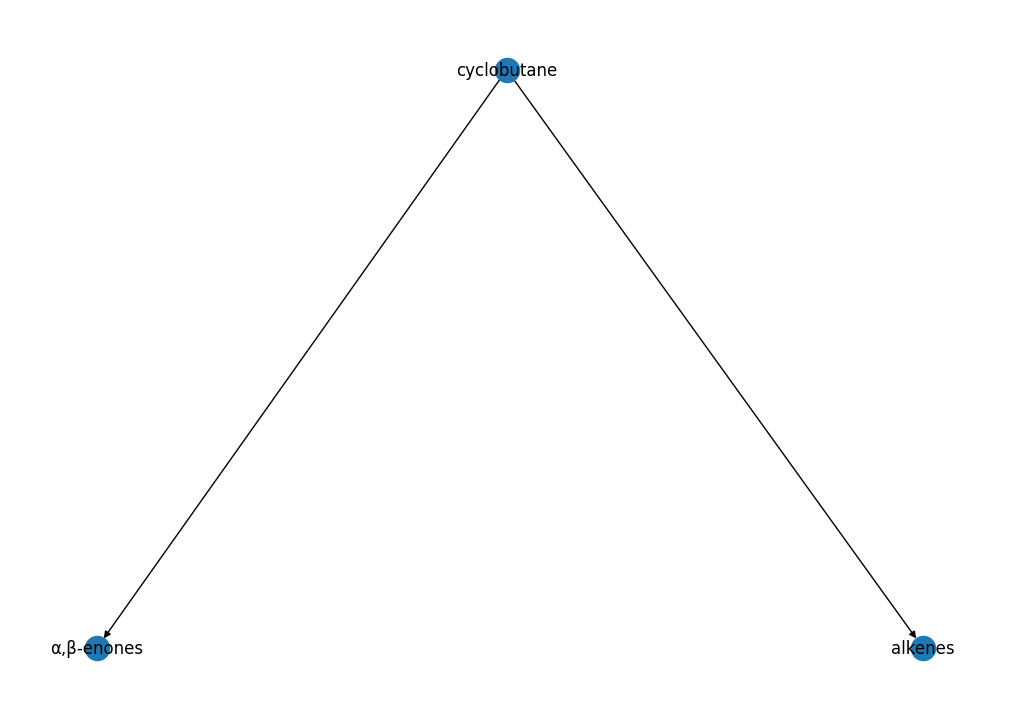

['α,β-enones', 'alkenes', 'cyclobutane']
25b


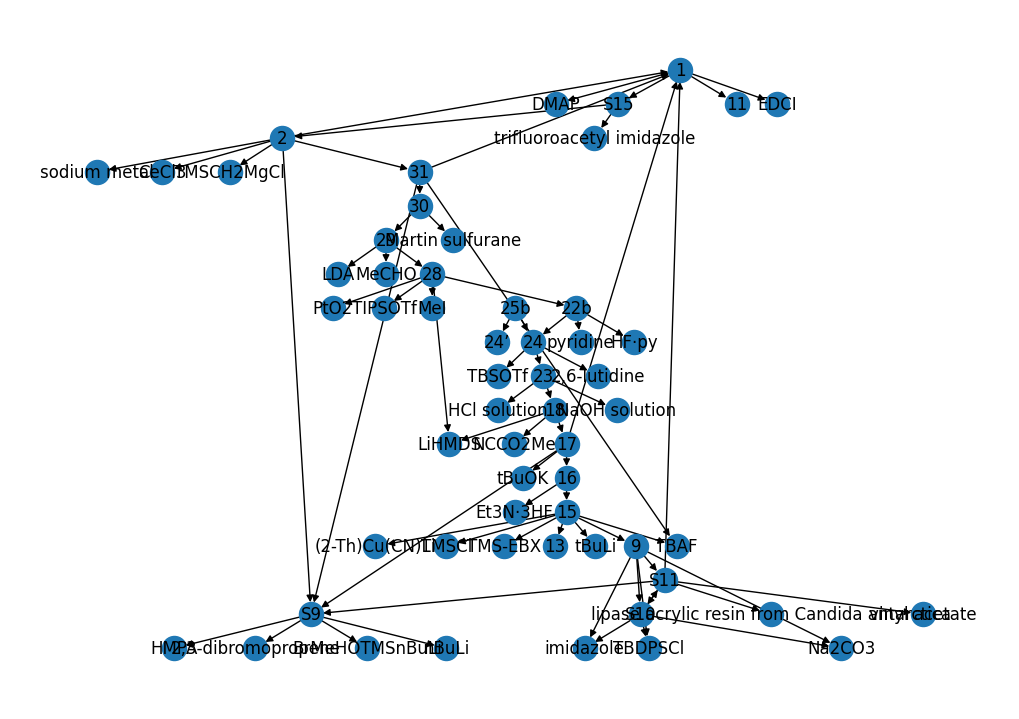

['1', '2', 'CeCl3', 'TMSCH2MgCl', 'S9', 'BrMeHOTMSnBuLi', 'nBuLi', 'HMPA', '2,3-dibromopropene', 'S11', 'S10', 'vinyl acetate', 'lipase acrylic resin from Candida antarctica', 'Na2CO3', 'imidazole', 'TBDPSCl', '9', '15', '13', 'tBuLi', '(2-Th)Cu(CN)Li', 'TMSCl', 'TMS-EBX', 'TBAF', '16', 'Et3N·3HF', '17', 'tBuOK', '18', 'LiHMDS', 'NCCO2Me', 'NaOH solution', '23', 'HCl solution', '24', '2,6-lutidine', 'TBSOTf', '22b', 'pyridine', 'HF·py', '28', 'PtO2', 'TIPSOTf', 'MeI', '29', 'LDA', 'MeCHO', '30', 'Martin sulfurane', '31', 'sodium metal', 'DMAP', 'S15', 'trifluoroacetyl imidazole', '11', 'EDCI', '25b', '24’']
S0


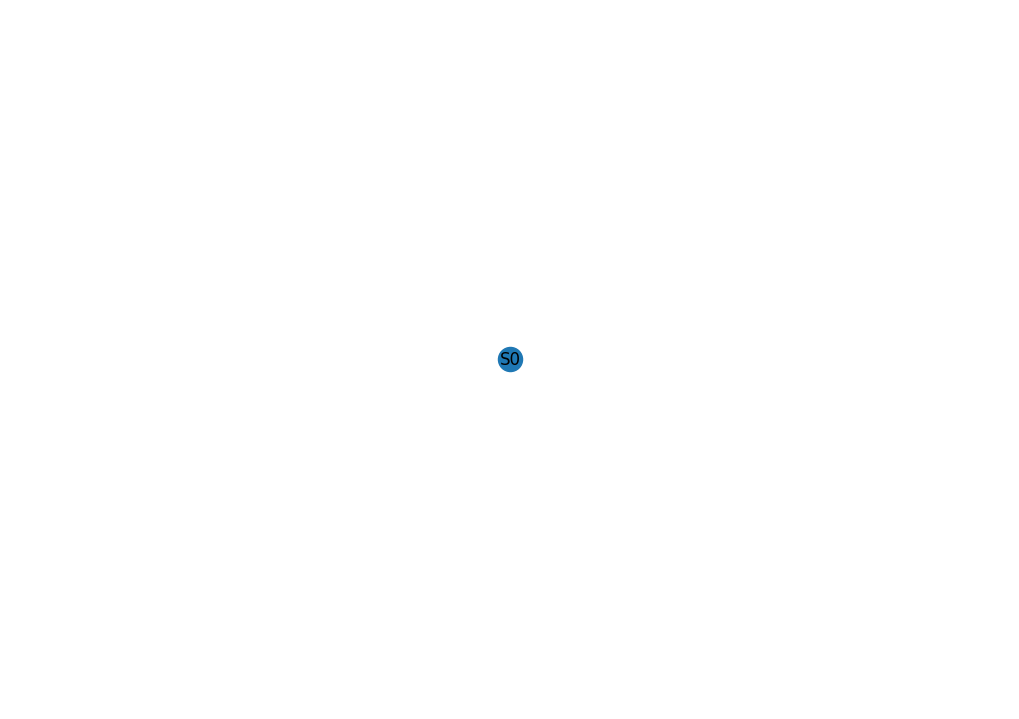

['S0']
T1


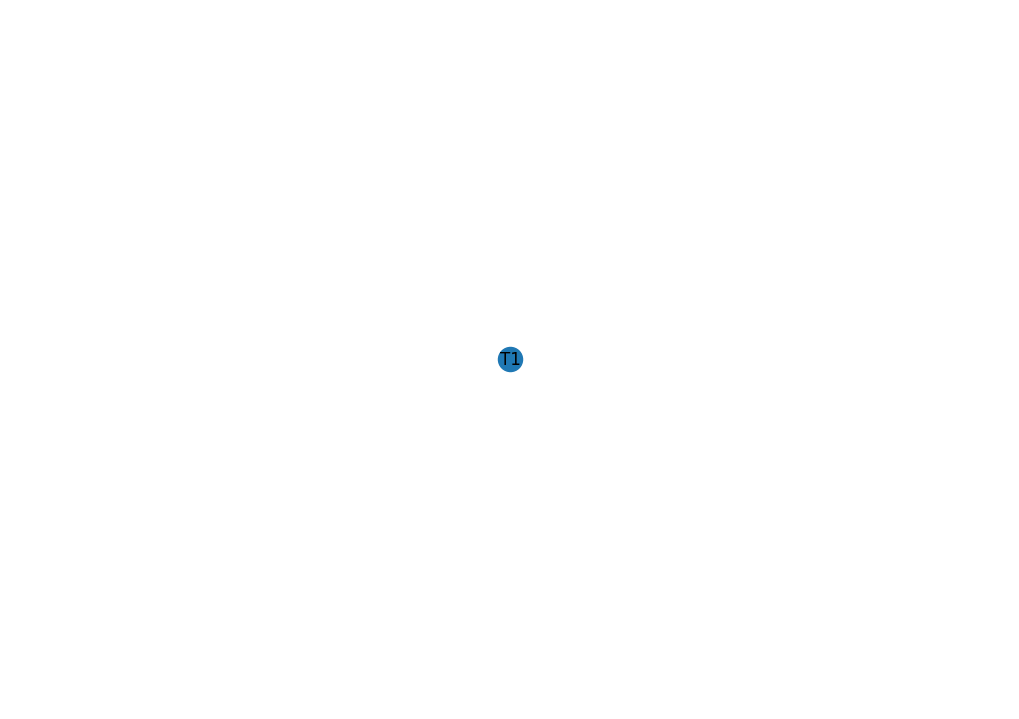

['T1']
27.2(5)


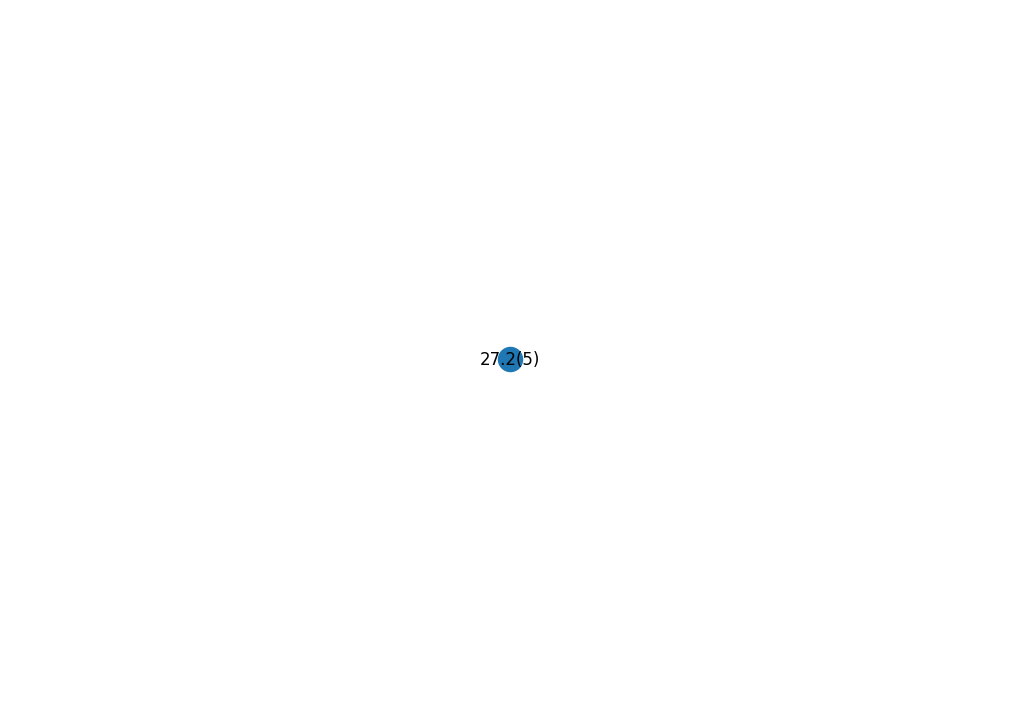

['27.2(5)']
C18


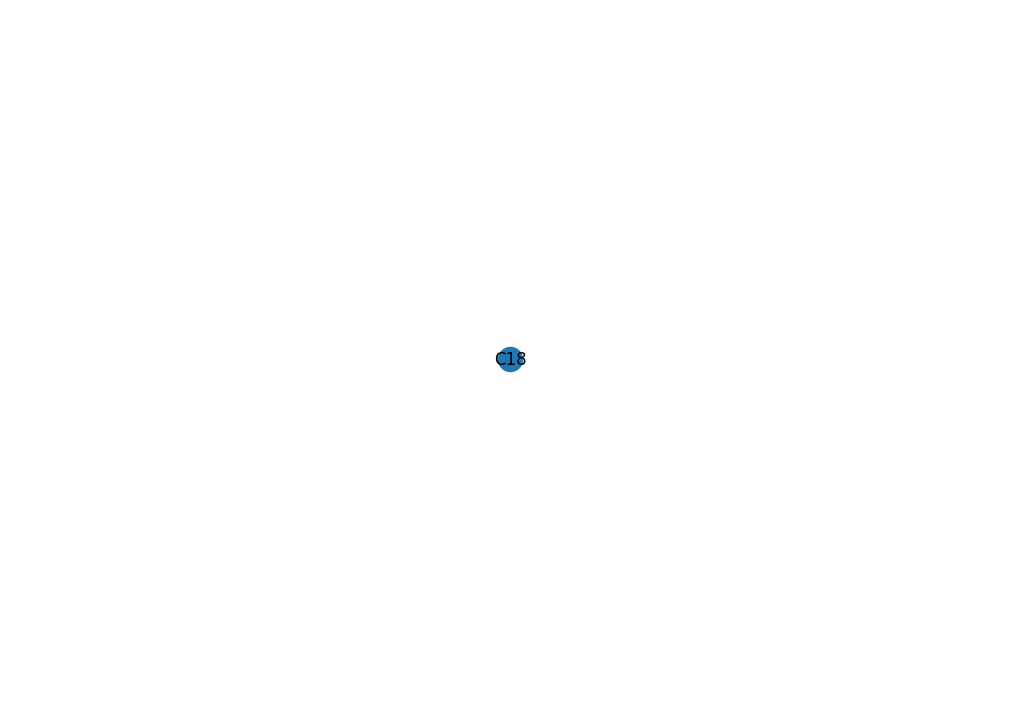

['C18']
20.2(11)


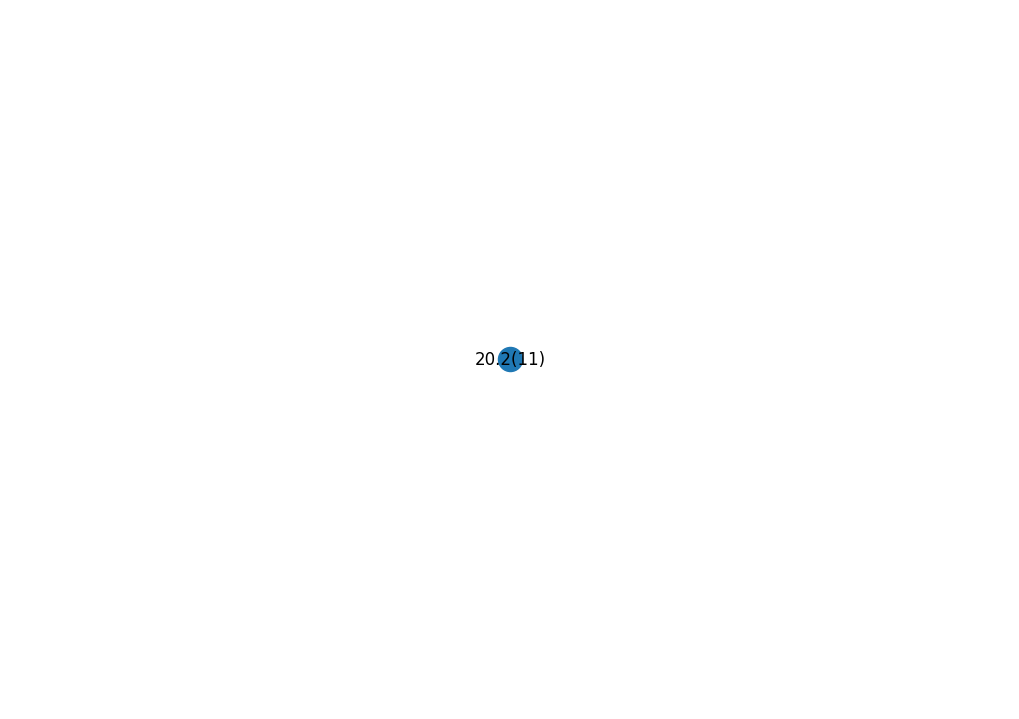

['20.2(11)']
21.1(12)


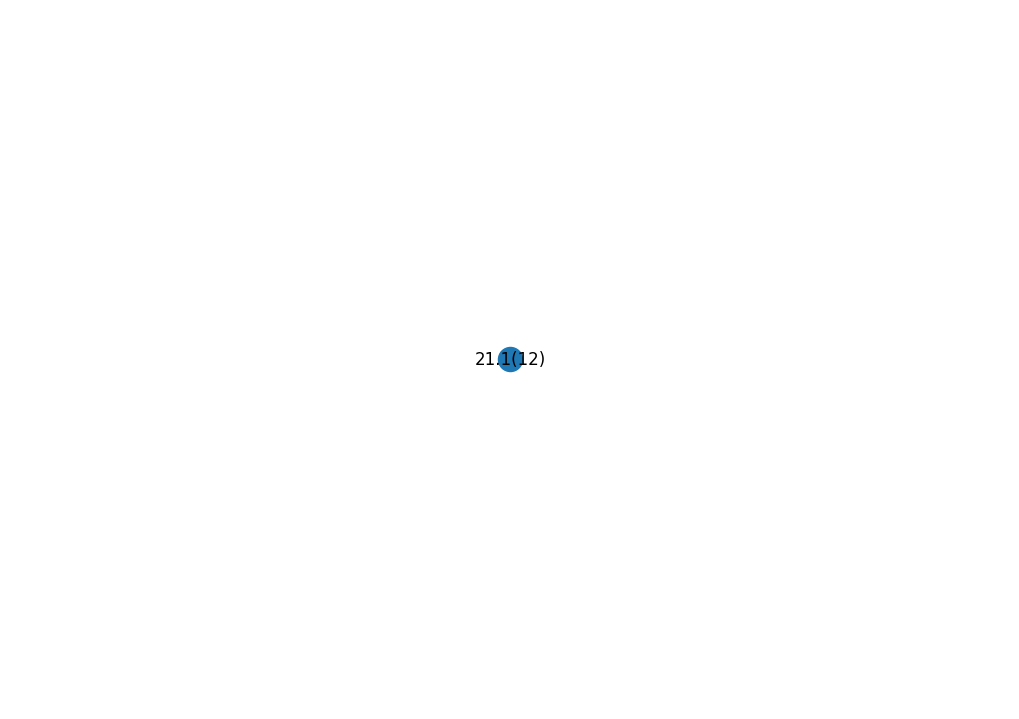

['21.1(12)']
27.7(12)


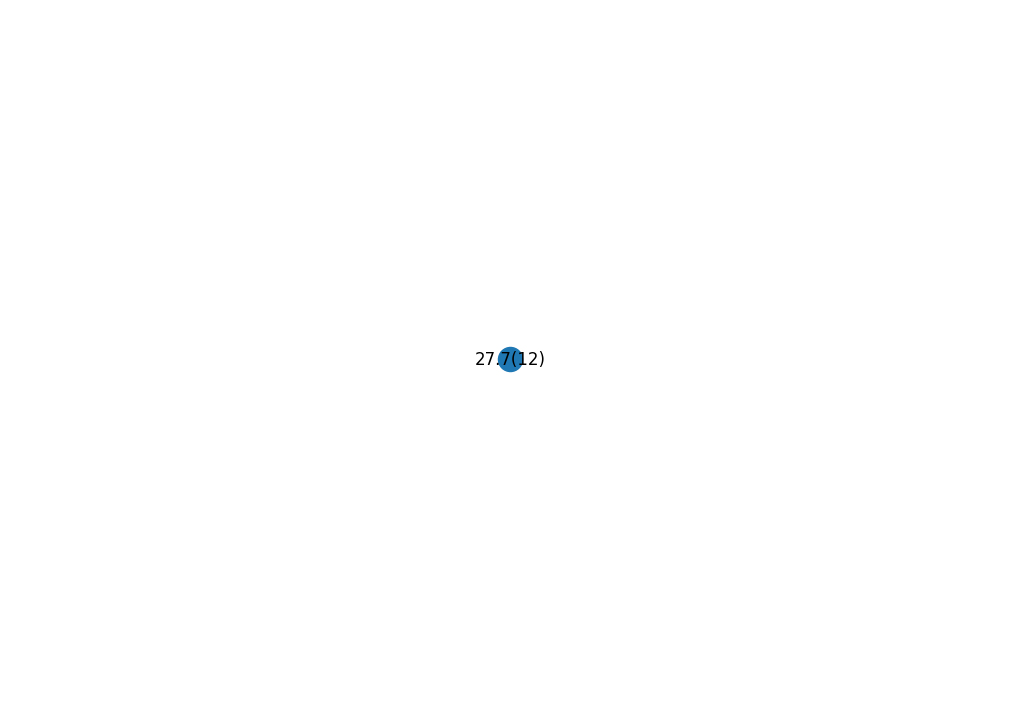

['27.7(12)']
22.7(13)


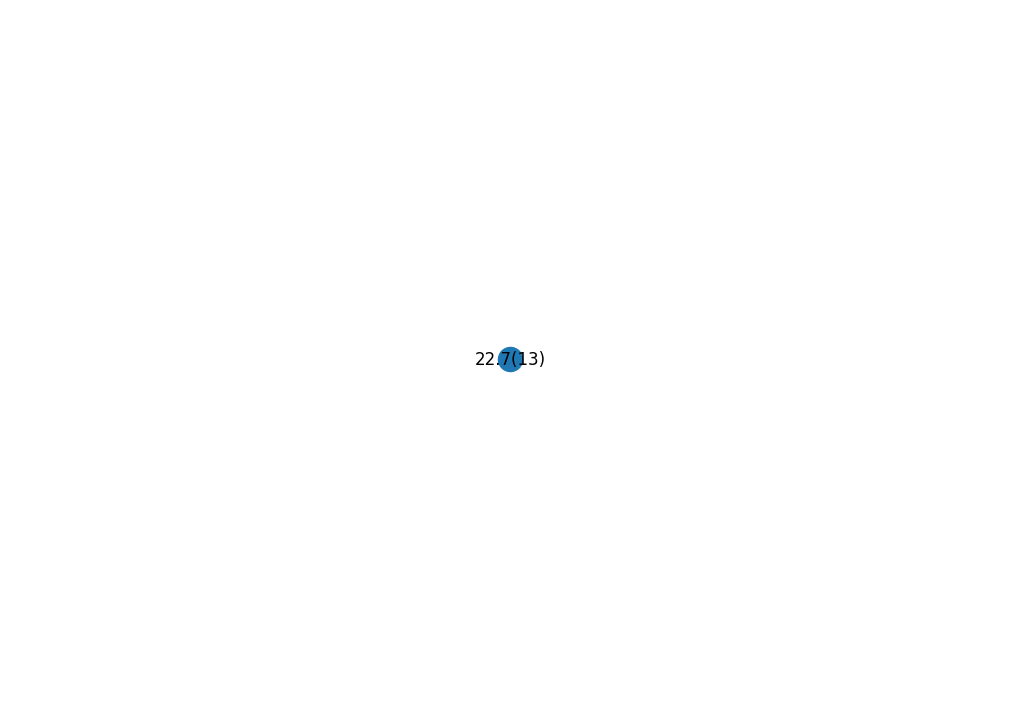

['22.7(13)']
17.8(10)


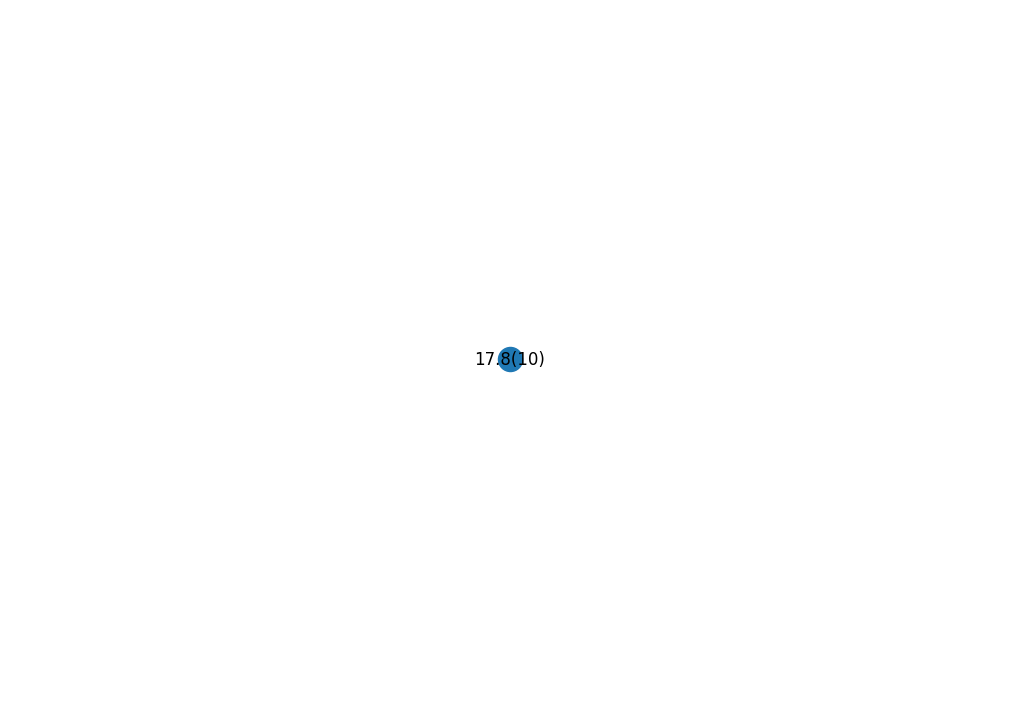

['17.8(10)']
31.2(4)


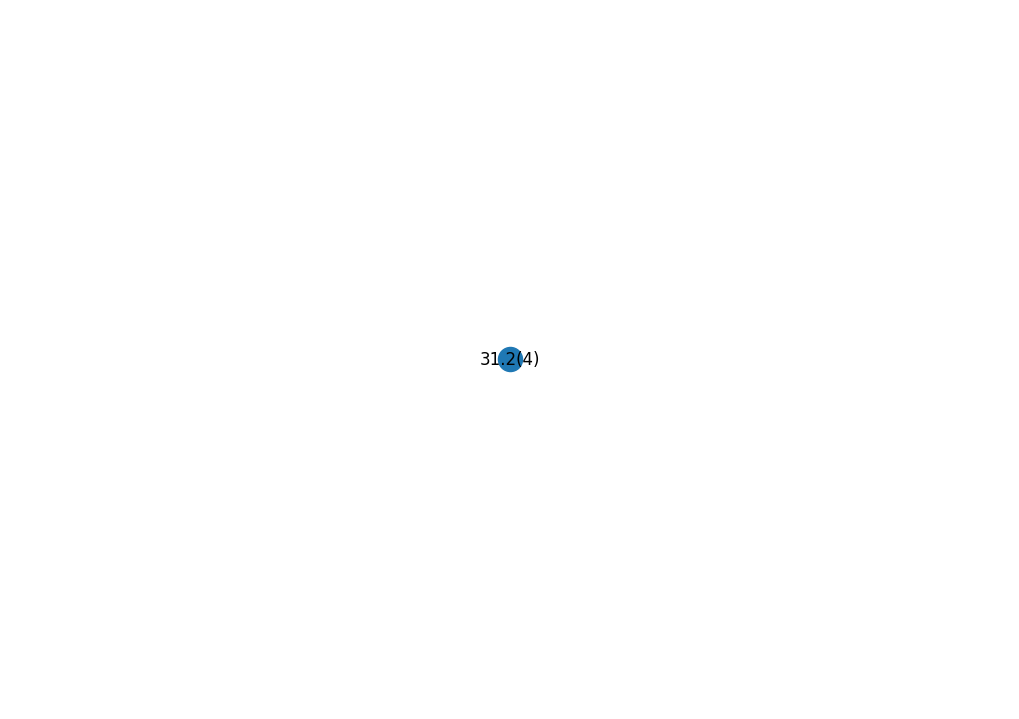

['31.2(4)']
C32


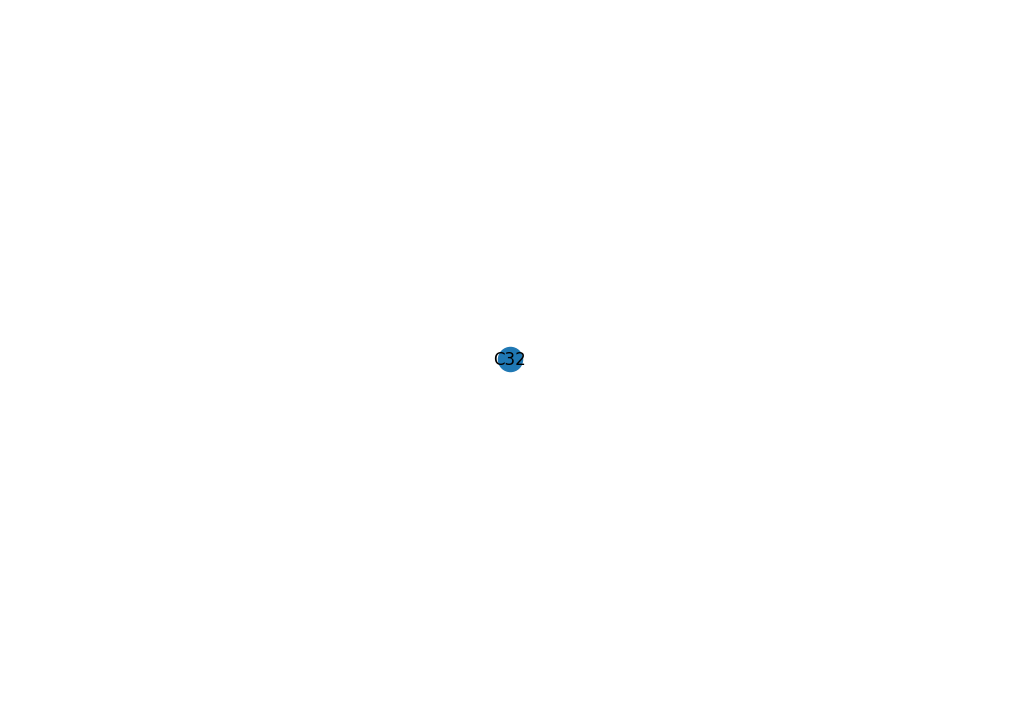

['C32']
H27A


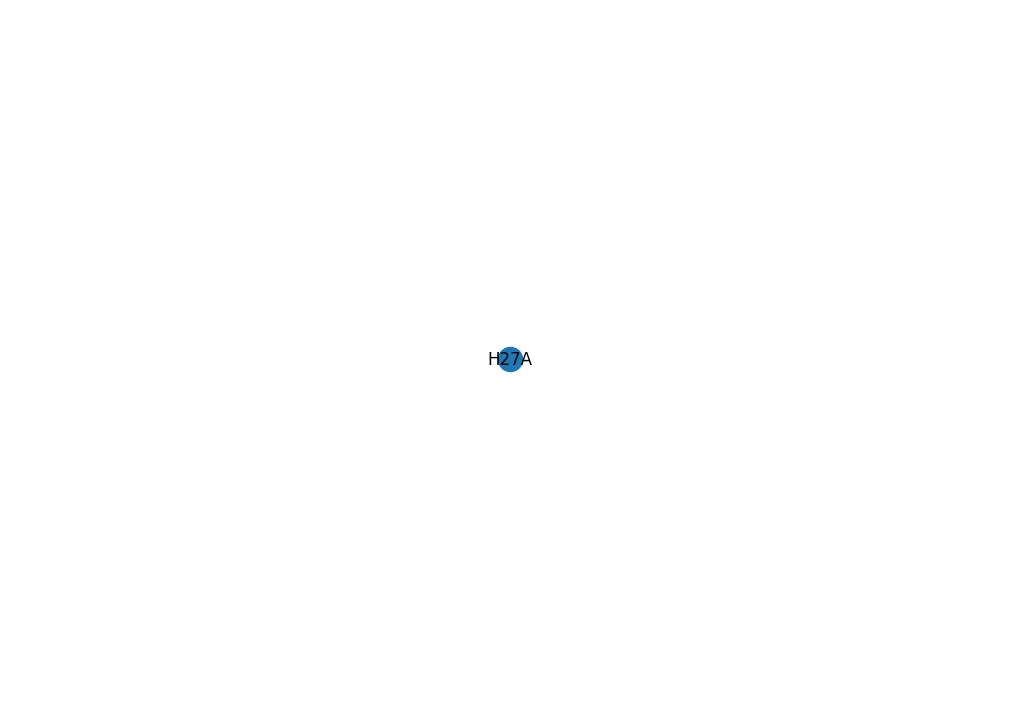

['H27A']


In [131]:
with open(os.path.join(path, "extracted_graph_gpt4t_text_.pickle"), "rb") as f:
    tree = pickle.load(f)

rsgss = SynthTree.get_reach_subgraphs(tree)
print(len(rsgss))

for k, g in rsgss.items():
    # if len(g) > 1:
    if not any(map(lambda x: x in g, gthn)):
        print(k)
        plot_graph(g)
        print(g.nodes)